In [163]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
from matplotlib.patches import Patch
from hydra import initialize, compose
from rdkit import Chem
from ergochemics.mapping import rc_to_nest, get_reaction_center
from ergochemics.draw import draw_reaction, draw_molecule
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import SVG
from minedatabase.pickaxe import Pickaxe

with initialize(version_base=None, config_path="../configs/filepaths"):
    cfg = compose(config_name="filepaths")

In [ ]:
expansion_name = "2_steps_ccm_aa_aplusb_True"
cpd_df = pd.read_parquet(Path(cfg.processed_data) / f"{expansion_name}_compound_metrics.parquet")
cpd_df = cpd_df.groupby(["expansion", "gen"]).agg({"fan_out": ["mean", "std"]}).reset_index()
cpd_df.head(24)

expansion gen     fan_out  \
                                                                mean   
0  2_steps_ccm_aa_rules_mechinformed_rules_w_core...   0  111.896552   
1  2_steps_ccm_aa_rules_mechinformed_rules_w_core...   1   26.923077   

               
          std  
0  194.829659  
1   20.073932

In [ ]:
rxn_df = pd.read_parquet(Path(cfg.processed_data) / f"{expansion_name}_reaction_metrics.parquet")
rxn_df = rxn_df.groupby("expansion").agg({"dxgb_label": "mean"}).reset_index()
rxn_df.head(12)

,smarts,dxgb_label,max_rxn_sim,nearest_analogue,nearest_analogue_id,id,rules,expansion
0,O=c1ccn(C2OC(COP(=O)(O)OP(=O)(O)OC3OC(CO)C(O)C...,1,0.134802,NC(=O)C1=CN(C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4c...,6848,Ra5466f30b2eff8d962354506782f3c774e2dbccfeabcc...,[813_1],2_steps_ccm_aa_rules_mechinformed_rules_w_core...
1,COC(=O)CCC(=O)O.Nc1ncnc2c1ncn2C1OC(CSCCC(N)C(=...,1,0.159809,*C1C(COP(=O)(O)OC2C(COP(=O)(O)OC3C(COP(=O)(O)O...,378,R5c55dfe0b19ad6176370398dd4dafc2d961191a71de1b...,[602_0],2_steps_ccm_aa_rules_mechinformed_rules_w_core...
2,Nc1ncnc2c1ncn2C1OC(COP(=O)(O)OP(=O)(O)OP(=O)(O...,0,0.240908,CC(C)=CCCC(C)=CCCC(C)=CCCC(C)=CCCC(C)=CCCC(C)=...,14751,R5b28ffe52136897a55d8462059e51a3e64423152d06a8...,"[863_2, 382_1, 631_1, 383_1, 333_1]",2_steps_ccm_aa_rules_mechinformed_rules_w_core...
3,O=C(O)CCC(=O)O.O=C(CCC(=O)C(=O)O)OP(=O)(O)OP(=...,0,0.073985,O=P(O)(O)O.O=P(O)(O)O.O=c1ccn(C2OC(COP(=O)(O)O...,8106,R287317fd5f7e4b93e5e9d67e6c4fcad2becf1a4ce76b2...,"[876_0_0, 876_0]",2_steps_ccm_aa_rules_mechinformed_rules_w_core...
4,NC(N)=NCCC(N)CC(=O)O>>NC(N)=NCC(N)CCC(=O)O,0,0.063500,NC(Cc1ccccc1)C(=O)O>>NC(CC(=O)O)c1ccccc1,10221,R30789c1c99e259bf2763a3562fef90e4e2f2abe2cc726...,[330_0],2_steps_ccm_aa_rules_mechinformed_rules_w_core...
5,NC(=O)CC(N)C(=O)OP(=O)(O)OP(=O)(O)O.NC(=O)CC(N...,0,0.166831,Nc1ncnc2c1ncn2C1OC(COP(=O)(O)OP(=O)(O)O)C(O)C1...,4249,Rb6752962e0f7d9a3b72690017ff2a5a6bc86c8783d519...,"[336_0, 632_0]",2_steps_ccm_aa_rules_mechinformed_rules_w_core...
6,O=C(O)CC(O)C(=O)O.CCC(C)C(N)C(=O)OP(=O)(O)O>>C...,1,0.119898,*C(=O)OCC(COP(=O)(O)OCC(O)CO)OC(*)=O.*C(=O)OCC...,4123,R8e47f448382bf72c94d2ab8b8b021d8c8f0d4b95c12a3...,"[814_0, 236_0, 236_0_0, 814_0_0]",2_steps_ccm_aa_rules_mechinformed_rules_w_core...
7,O=C(O)CCC(=O)O.NC(Cc1ccccc1)C(=O)O[C@H]1O[C@H]...,0,0.070430,O=S(=O)(O)O.CC12CCC3C(CC=C4CC(O)CCC43C)C1CCC2=...,9832,Rec43c4e0093f3238ee1c78030325f07510d6501e6fefb...,"[547_0, 547_0_0]",2_steps_ccm_aa_rules_mechinformed_rules_w_core...
8,NC(=O)C1=CN(C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4c...,0,0.124684,NC(=O)C1=CN(C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4c...,9698,R6a494df03824d1fa2f0cfd39e60002e0acc3be3b140ab...,[874_0],2_steps_ccm_aa_rules_mechinformed_rules_w_core...
9,CC(=O)CC(=O)OP(=O)(O)O>>CC(=O)CC(=O)O.[O][P](=O)O,0,0.093073,CC(CO)(OP(=O)(O)O)C(O)COP(=O)(O)OP(=O)(O)OCC1O...,1165,Rf105eac78c6e6a2a5b1e6587b0c4633d890f9d9d8edd1...,[45_0],2_steps_ccm_aa_rules_mechinformed_rules_w_core...


In [166]:
ct_data = []
for exp in rxn_df.expansion:
    pk = Pickaxe()
    pk.load_pickled_pickaxe(Path(cfg.interim_data) / exp)
    ct_data.append([exp, len(pk.reactions), len(pk.compounds)])

ct_df = pd.DataFrame(
    data=ct_data,
    columns=["expansion", "n_rxns", "n_cpds"]
)
ct_df.head()

----------------------------------------
Intializing pickaxe object

Done intializing pickaxe object
----------------------------------------

Loading /home/stef/cgr/data/interim/2_steps_ccm_aa_rules_imt_rules_w_coreactants_aplusb_True.pk pickled data.


[12:48:33] WARNING: not removing hydrogen atom without neighbors


Loaded 49241 compounds
Loaded 80395 reactions
Loaded 1852 operators
Loaded 64 coreactants
Loaded 2 generation
Took 2.1428401470184326
----------------------------------------
Intializing pickaxe object

Done intializing pickaxe object
----------------------------------------

Loading /home/stef/cgr/data/interim/2_steps_ccm_aa_rules_mechinferred_dt_15_rules_w_coreactants_aplusb_True.pk pickled data.


[12:48:34] WARNING: not removing hydrogen atom without neighbors


Loaded 13600 compounds
Loaded 22671 reactions
Loaded 3746 operators
Loaded 67 coreactants
Loaded 2 generation
Took 0.7338380813598633
----------------------------------------
Intializing pickaxe object

Done intializing pickaxe object
----------------------------------------

Loading /home/stef/cgr/data/interim/2_steps_ccm_aa_rules_mechinferred_dt_2_rules_w_coreactants_aplusb_True.pk pickled data.


[12:48:37] WARNING: not removing hydrogen atom without neighbors


Loaded 6259 compounds
Loaded 9809 reactions
Loaded 7335 operators
Loaded 71 coreactants
Loaded 2 generation
Took 2.542391300201416
----------------------------------------
Intializing pickaxe object

Done intializing pickaxe object
----------------------------------------

Loading /home/stef/cgr/data/interim/2_steps_ccm_aa_rules_mechinferred_dt_3_rules_w_coreactants_aplusb_True.pk pickled data.


[12:48:40] WARNING: not removing hydrogen atom without neighbors


Loaded 8066 compounds
Loaded 13245 reactions
Loaded 6236 operators
Loaded 70 coreactants
Loaded 2 generation
Took 1.9142911434173584
----------------------------------------
Intializing pickaxe object

Done intializing pickaxe object
----------------------------------------

Loading /home/stef/cgr/data/interim/2_steps_ccm_aa_rules_mechinferred_dt_6_rules_w_coreactants_aplusb_True.pk pickled data.


[12:48:43] WARNING: not removing hydrogen atom without neighbors


Loaded 9248 compounds
Loaded 15729 reactions
Loaded 5473 operators
Loaded 69 coreactants
Loaded 2 generation
Took 1.9191861152648926
----------------------------------------
Intializing pickaxe object

Done intializing pickaxe object
----------------------------------------

Loading /home/stef/cgr/data/interim/2_steps_ccm_aa_rules_mechinferred_dt_98_rules_w_coreactants_aplusb_True.pk pickled data.


[12:48:44] WARNING: not removing hydrogen atom without neighbors
[12:48:44] WARNING: not removing hydrogen atom without neighbors


Loaded 20312 compounds
Loaded 32908 reactions
Loaded 2207 operators
Loaded 65 coreactants
Loaded 2 generation
Took 0.7548308372497559
----------------------------------------
Intializing pickaxe object

Done intializing pickaxe object
----------------------------------------

Loading /home/stef/cgr/data/interim/2_steps_ccm_aa_rules_mechinformed_rules_w_coreactants_aplusb_True.pk pickled data.
Loaded 6629 compounds
Loaded 11711 reactions
Loaded 757 operators
Loaded 66 coreactants
Loaded 2 generation
Took 0.20459961891174316
----------------------------------------
Intializing pickaxe object

Done intializing pickaxe object
----------------------------------------

Loading /home/stef/cgr/data/interim/2_steps_ccm_aa_rules_rc_plus_0_rules_w_coreactants_aplusb_True.pk pickled data.


[12:48:56] WARNING: not removing hydrogen atom without neighbors


Loaded 372224 compounds
Loaded 702208 reactions
Loaded 1453 operators
Loaded 58 coreactants
Loaded 2 generation
Took 11.377429485321045
----------------------------------------
Intializing pickaxe object

Done intializing pickaxe object
----------------------------------------

Loading /home/stef/cgr/data/interim/2_steps_ccm_aa_rules_rc_plus_1_rules_w_coreactants_aplusb_True.pk pickled data.


[12:48:57] WARNING: not removing hydrogen atom without neighbors


Loaded 5756 compounds
Loaded 9210 reactions
Loaded 3853 operators
Loaded 71 coreactants
Loaded 2 generation
Took 0.6674985885620117
----------------------------------------
Intializing pickaxe object

Done intializing pickaxe object
----------------------------------------

Loading /home/stef/cgr/data/interim/2_steps_ccm_aa_rules_rc_plus_2_rules_w_coreactants_aplusb_True.pk pickled data.


[12:48:58] WARNING: not removing hydrogen atom without neighbors


Loaded 2273 compounds
Loaded 3477 reactions
Loaded 5266 operators
Loaded 72 coreactants
Loaded 2 generation
Took 1.3737273216247559
----------------------------------------
Intializing pickaxe object

Done intializing pickaxe object
----------------------------------------

Loading /home/stef/cgr/data/interim/2_steps_ccm_aa_rules_rc_plus_3_rules_w_coreactants_aplusb_True.pk pickled data.


[12:49:01] WARNING: not removing hydrogen atom without neighbors


Loaded 1373 compounds
Loaded 1881 reactions
Loaded 6351 operators
Loaded 74 coreactants
Loaded 2 generation
Took 1.8340682983398438
----------------------------------------
Intializing pickaxe object

Done intializing pickaxe object
----------------------------------------

Loading /home/stef/cgr/data/interim/2_steps_ccm_aa_rules_rc_plus_4_rules_w_coreactants_aplusb_True.pk pickled data.
Loaded 1176 compounds
Loaded 1597 reactions
Loaded 7204 operators
Loaded 74 coreactants
Loaded 2 generation
Took 2.596092700958252


[12:49:04] WARNING: not removing hydrogen atom without neighbors


,expansion,n_rxns,n_cpds
0,2_steps_ccm_aa_rules_imt_rules_w_coreactants_a...,80395,49241
1,2_steps_ccm_aa_rules_mechinferred_dt_15_rules_...,22671,13600
2,2_steps_ccm_aa_rules_mechinferred_dt_2_rules_w...,9809,6259
3,2_steps_ccm_aa_rules_mechinferred_dt_3_rules_w...,13245,8066
4,2_steps_ccm_aa_rules_mechinferred_dt_6_rules_w...,15729,9248


In [167]:
exp_names = rxn_df.expansion.to_list()
perm = [6, 0, 7, 8, 9, 10, 11, 5, 1, 4, 3, 2]
exp_names = [exp_names[p] for p in perm]
exp_labels = {
    '2_steps_ccm_aa_rules_mechinformed_rules_w_coreactants_aplusb_True.pk': "Mechinformed",
    '2_steps_ccm_aa_rules_imt_rules_w_coreactants_aplusb_True.pk': "Ni intermediate",
    '2_steps_ccm_aa_rules_rc_plus_0_rules_w_coreactants_aplusb_True.pk': "RC + 0",
    '2_steps_ccm_aa_rules_rc_plus_1_rules_w_coreactants_aplusb_True.pk': "RC + 1",
    '2_steps_ccm_aa_rules_rc_plus_2_rules_w_coreactants_aplusb_True.pk': "RC + 2",
    '2_steps_ccm_aa_rules_rc_plus_3_rules_w_coreactants_aplusb_True.pk': "RC + 3",
    '2_steps_ccm_aa_rules_rc_plus_4_rules_w_coreactants_aplusb_True.pk': "RC + 4",
    '2_steps_ccm_aa_rules_mechinferred_dt_98_rules_w_coreactants_aplusb_True.pk': "Mechinferred >0.98",
    '2_steps_ccm_aa_rules_mechinferred_dt_15_rules_w_coreactants_aplusb_True.pk': "Mechinferred >0.15",
    '2_steps_ccm_aa_rules_mechinferred_dt_6_rules_w_coreactants_aplusb_True.pk': "Mechinferred >0.06",
    '2_steps_ccm_aa_rules_mechinferred_dt_3_rules_w_coreactants_aplusb_True.pk': "Mechinferred >0.03",
    '2_steps_ccm_aa_rules_mechinferred_dt_2_rules_w_coreactants_aplusb_True.pk': "Mechinferred >0.02"
}

colors = {
    '2_steps_ccm_aa_rules_mechinformed_rules_w_coreactants_aplusb_True.pk': matplotlib.colors.to_rgba("green"),
    '2_steps_ccm_aa_rules_imt_rules_w_coreactants_aplusb_True.pk': matplotlib.colors.to_rgba("blue"),
    '2_steps_ccm_aa_rules_rc_plus_0_rules_w_coreactants_aplusb_True.pk': matplotlib.colors.to_rgba("black", alpha=0.3),
    '2_steps_ccm_aa_rules_rc_plus_1_rules_w_coreactants_aplusb_True.pk':matplotlib.colors.to_rgba("black", alpha=0.45),
    '2_steps_ccm_aa_rules_rc_plus_2_rules_w_coreactants_aplusb_True.pk': matplotlib.colors.to_rgba("black", alpha=0.6),
    '2_steps_ccm_aa_rules_rc_plus_3_rules_w_coreactants_aplusb_True.pk': matplotlib.colors.to_rgba("black", alpha=0.85),
    '2_steps_ccm_aa_rules_rc_plus_4_rules_w_coreactants_aplusb_True.pk': matplotlib.colors.to_rgba("black", alpha=1.0),
    '2_steps_ccm_aa_rules_mechinferred_dt_98_rules_w_coreactants_aplusb_True.pk': matplotlib.colors.to_rgba("purple", alpha=0.3),
    '2_steps_ccm_aa_rules_mechinferred_dt_15_rules_w_coreactants_aplusb_True.pk': matplotlib.colors.to_rgba("purple", alpha=0.45),
    '2_steps_ccm_aa_rules_mechinferred_dt_6_rules_w_coreactants_aplusb_True.pk': matplotlib.colors.to_rgba("purple", alpha=0.6),
    '2_steps_ccm_aa_rules_mechinferred_dt_3_rules_w_coreactants_aplusb_True.pk': matplotlib.colors.to_rgba("purple", alpha=0.85),
    '2_steps_ccm_aa_rules_mechinferred_dt_2_rules_w_coreactants_aplusb_True.pk': matplotlib.colors.to_rgba("purple", alpha=1.0)
}

legend_elements = [
    Patch(facecolor=col, edgecolor='w', label=exp_labels[name])
    for name, col in colors.items()
]

In [168]:
print(matplotlib.colors.to_rgba("blue"))
print(matplotlib.colors.to_rgba("purple"))
print(matplotlib.colors.to_rgba("black"))
print(matplotlib.colors.to_rgba("green"))

(0.0, 0.0, 1.0, 1.0)
(0.5019607843137255, 0.0, 0.5019607843137255, 1.0)
(0.0, 0.0, 0.0, 1.0)
(0.0, 0.5019607843137255, 0.0, 1.0)


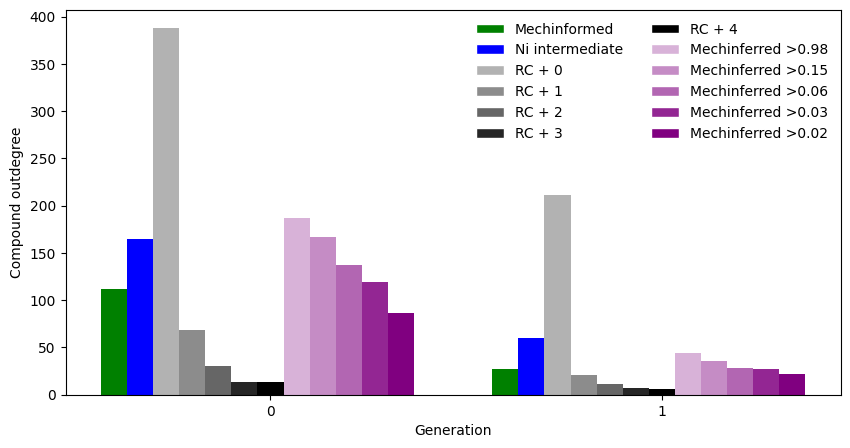

In [169]:
# Fan out clustered bar graph

gens = cpd_df.gen.unique()
scl_space = 1.5
n_bars = len(exp_labels)
width = 0.1

fig, ax = plt.subplots(figsize=(10, 5))

for gen in gens:
    ctr = gen * scl_space
    for i in range(n_bars):
        tick = ctr - ((n_bars * width) / 2) + (i * width)
        exp_name = exp_names[i]
        mean_fan_out = cpd_df.loc[(cpd_df["gen"] == gen) & (cpd_df["expansion"] == exp_name), "fan_out"]["mean"].values[0]
        label = exp_labels[exp_name]
        color = colors[exp_name]
        ax.bar(tick, height=mean_fan_out, width=width, color=color, label=label)
ax.set_xticks(gens * scl_space)
ax.set_xticklabels(gens.astype(int))

ax.set_xlabel("Generation")
ax.set_ylabel("Compound outdegree")
ax.legend(handles=legend_elements, loc='upper right', ncol=2, frameon=False, fontsize=10)
plt.show()
        

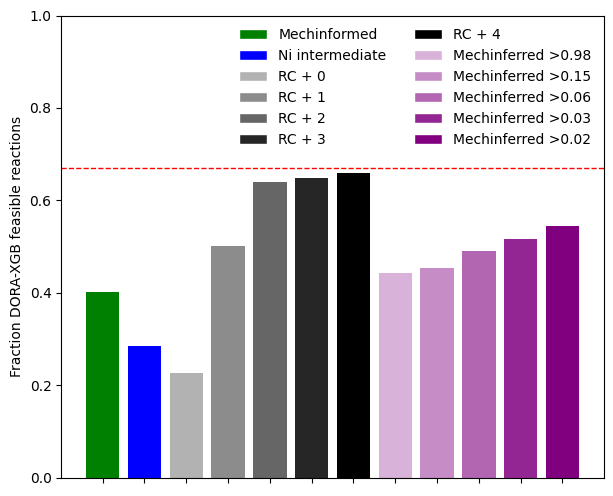

In [202]:
fig, ax = plt.subplots(figsize=(7, 6))
width = 0.8
for exp_name in exp_names:
    feas_frac = rxn_df.loc[rxn_df["expansion"] == exp_name, "dxgb_label"].values[0]
    color = colors[exp_name]
    ax.bar(x=exp_name, height=feas_frac, width=width, color=color)

ax.axhline(y=0.67, color='red', linestyle='--', linewidth=1)
ax.set_xticklabels(labels=[])
ax.legend(handles=legend_elements, loc='upper right', ncol=2, frameon=False, fontsize=10)
ax.set_ylim(0, 1.0)
ax.set_ylabel("Fraction DORA-XGB feasible reactions")
plt.show()

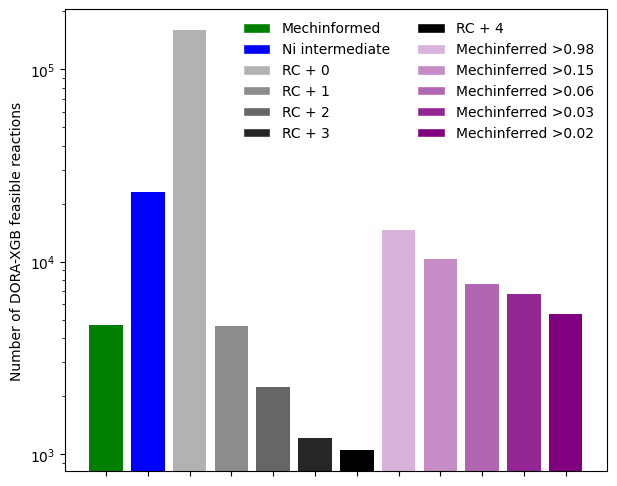

In [171]:
fig, ax = plt.subplots(figsize=(7, 6))
width = 0.8
for exp_name in exp_names:
    feas_frac = rxn_df.loc[rxn_df["expansion"] == exp_name, "dxgb_label"].values[0]
    tot_rxns = ct_df.loc[ct_df["expansion"] == exp_name, "n_rxns"].values[0]
    color = colors[exp_name]
    ax.bar(x=exp_name, height=feas_frac * tot_rxns, width=width, color=color)

ax.set_xticklabels(labels=[])
ax.legend(handles=legend_elements, loc='upper right', ncol=2, frameon=False, fontsize=10)
ax.set_ylabel("Number of DORA-XGB feasible reactions")
ax.set_yscale('log')
plt.show()

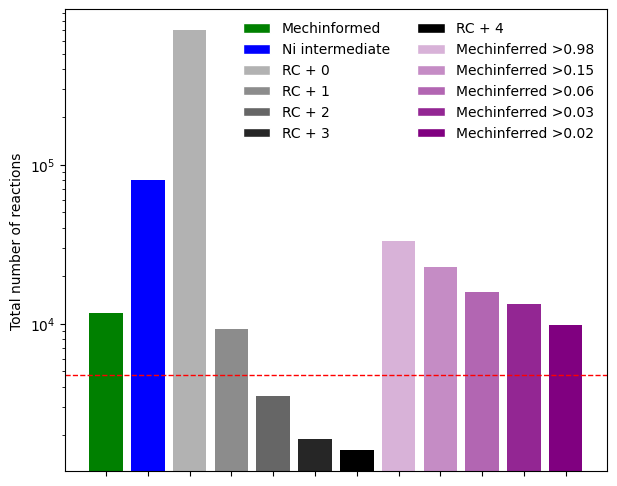

In [203]:
fig, ax = plt.subplots(figsize=(7, 6))
width = 0.8
for exp_name in exp_names:
    tot_rxns = ct_df.loc[ct_df["expansion"] == exp_name, "n_rxns"].values[0]
    color = colors[exp_name]
    ax.bar(x=exp_name, height=tot_rxns, width=width, color=color)

ax.axhline(y=4723, color='red', linestyle='--', linewidth=1)
ax.set_xticklabels(labels=[])
ax.legend(handles=legend_elements, loc='upper right', ncol=2, frameon=False, fontsize=10)
ax.set_ylabel("Total number of reactions")
ax.set_yscale('log')
plt.show()

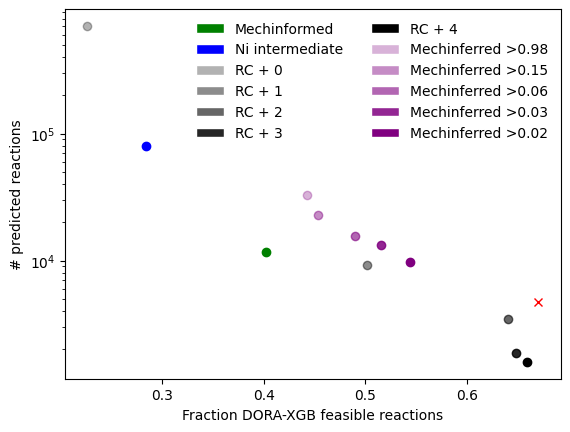

In [194]:
fig, ax = plt.subplots()
for exp_name in exp_names:
    feas_frac = rxn_df.loc[rxn_df["expansion"] == exp_name, "dxgb_label"].values[0]
    tot_rxns = ct_df.loc[ct_df["expansion"] == exp_name, "n_rxns"].values[0]
    color = colors[exp_name]
    label = exp_labels[exp_name]
    ax.plot(feas_frac, tot_rxns, "o", color=color, label=label)

ax.plot(0.67, 4723, 'x', color='red', label="Known")
ax.legend(handles=legend_elements, loc='upper right', ncol=2, frameon=False, fontsize=10)
ax.set_ylabel("# predicted reactions")
ax.set_xlabel("Fraction DORA-XGB feasible reactions")
ax.set_yscale('log')
plt.show()

In [94]:
rxn_df = pd.read_parquet(Path(cfg.processed_data) / f"{expansion_name}_reaction_metrics.parquet")
rxn_df.head(12)

,smarts,dxgb_label,id,rules,expansion
0,O=c1ccn(C2OC(COP(=O)(O)OP(=O)(O)OC3OC(CO)C(O)C...,1,Ra5466f30b2eff8d962354506782f3c774e2dbccfeabcc...,[813_1],2_steps_ccm_aa_rules_mechinformed_rules_w_core...
1,O=C(O)CCC(=O)O.CC(N)C(=O)O>>CC(NC(=O)CCC(=O)O)...,1,R1a6f3d7e229c81ffd5e77b63a4191e793232130cbc0e0...,"[8_0, 8_0_0, 8_0_0_0]",2_steps_ccm_aa_rules_mechinformed_rules_w_core...
2,O=c1ccn(C2OC(COP(=O)(O)OP(=O)(O)OC3OC(CO)C(O)C...,1,Ra9e6706c0b8df38fa1056bb4ad1ac443a60e95f3e02f1...,[558_1],2_steps_ccm_aa_rules_mechinformed_rules_w_core...
3,O=C(O)CCC(=O)O.O=C(O)CCC(=O)O>>O.O=C(O)CCC(=O)...,0,Rec6d7525917f77e5f6c7a5942c1b7197b67be650c7476...,"[167_0, 167_0_1, 167_0_0]",2_steps_ccm_aa_rules_mechinformed_rules_w_core...
4,Nc1ncnc2c1ncn2C1OC(COP(=O)(O)OP(=O)(O)OP(=O)(O...,0,R3b25a7e0bed159020e2a34dc51c3cf7529c6ec4038177...,"[382_1, 333_1, 631_1]",2_steps_ccm_aa_rules_mechinformed_rules_w_core...
5,O=C(O)CCC(=O)O.NC(=O)C1=CN(C2OC(COP(=O)(O)OP(=...,0,Rdda1a22bada4082a3d67c1cd21dc3a233ae59012560a3...,[177_0],2_steps_ccm_aa_rules_mechinformed_rules_w_core...
6,O=C(O)CC(O)C(=O)O.O=C(O)CCC(=O)O>>O=C(O)CCC(=O...,0,R6dc78a68eef458cf00438747bfce2c91d2d4bd21a1da9...,"[703_0, 703_0_0_0, 703_0_0]",2_steps_ccm_aa_rules_mechinformed_rules_w_core...
7,O=C(O)CC(O)C(=O)O.O=C(O)CCC(=O)O>>O=C(O)CCC(=O...,0,Rf38295782a37516f50c0a439e1529a53e2a9c6a384178...,"[703_0, 703_0_0_0, 703_0_0]",2_steps_ccm_aa_rules_mechinformed_rules_w_core...
8,O=C(O)CCC(=O)O.NC(CS)C(=O)O>>NC(CSC(=O)CCC(=O)...,1,Rd5f9bc7f1dff6d19cd8c03152d4455d66d5bedf22be69...,"[216_0_0, 216_0_0_0, 216_0]",2_steps_ccm_aa_rules_mechinformed_rules_w_core...
9,O=C(O)CCC(=O)O.Nc1ncnc2c1ncn2C1OC(COP(=O)(O)OS...,0,Rd09eb66e0f70c16c4039f1c963e3916e3bdc2b673aac4...,[891_0],2_steps_ccm_aa_rules_mechinformed_rules_w_core...


In [114]:
mechinformed = rxn_df.loc[rxn_df.expansion == '2_steps_ccm_aa_rules_mechinformed_rules_w_coreactants_aplusb_True.pk']

In [ ]:
def show_mechinformed_reaction(idx):
    row = mechinformed.iloc[idx]
    print(f"dxgb_label: {row['dxgb_label']}")
    print(f"rule: {row["rules"]}")
    display(SVG(draw_reaction(row['smarts'])))

interact(show_mechinformed_reaction, idx=widgets.IntSlider(min=0, max=len(mechinformed)-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='idx', max=11708), Output()), _dom_classes=('widget-inter…

<function __main__.show_mechinformed_reaction(idx)>

In [116]:
sprhea_x_mechinformed = pd.read_parquet(Path(cfg.raw_data) / "mapped_sprhea_240310_v3_mapped_no_subunits_x_mechinformed_rules.parquet")
sprhea_x_mechinformed.head()

,rxn_id,smarts,am_smarts,rule,template_aidxs,rule_id
0,1,CC(O)C(O)C(O)C(O)C(=O)O>>O.CC(O)C(O)CC(=O)C(=O)O,[CH3:11][CH:9]([OH:12])[CH:8]([OH:10])[CH:7]([...,[O&D1&v2&H0&0*&!R:1]=[C&D3&v4&H0&0*&!R&z2:2](-...,"10,9,11,7,8,5,6>>0;5,6,7,8,9,10",841
1,10,O=P(O)(O)OP(=O)(O)O.CCCCCCCCCCCC(=O)OP(=O)(O)O...,[O:10]=[P:1]([OH:2])([OH:11])[O:3][P:4](=[O:5]...,[*:1](~[O&D1&v2&H1&0*&!R:2])~[*:3]~[*:4](~[O&D...,"1,2,4,5,6,7,8;14,16,13>>15,17,18,19,20,21,22,2...",632
2,100,*C(=O)OCC(COP(=O)(O)OC1C(O)C(OP(=O)(O)O)C(O)C(...,[*:30][C:27](=[O:31])[O:25][CH2:23][CH:22]([CH...,[*:1](~[O&D2&v2&H0&0*&!R:2]-[P&D4&v5&H0&0*&!R:...,"15,16,17,19,13,14;0>>13,14,15,16;1,2,3",813
3,10001,Nc1c(NCC(O)C(O)C(O)CO)[nH]c(=O)[nH]c1=O.Cc1cc2...,[NH2:25][c:26]1[c:27]([NH:29][CH2:36][CH:37]([...,[N&D1&v3&H2&0*&!R:1]-[c&D3&v4&H0&0*&R&z1:2]:[c...,"0,1,2,3,13;1,2,3,4,5,12,11,9,10,23,24,25>>0,1,...",338
4,10008,O.O=[N+]([O-])c1ccc(OP(=O)(O)O)cc1>>O=P(O)(O)O...,[OH2:5].[O:14]=[N+:13]([O-:15])[c:12]1[cH:10][...,[O&D0&v2&H2&0*&!R:1].[O&D2&v2&H0&0*&!R:2]-[P&D...,"0;7,8,9,10,11>>0,1,2,3,4;7",585


In [159]:
mapped = sprhea_x_mechinformed.loc[sprhea_x_mechinformed.rule_id == 703]

In [161]:
def show_mapped_reaction(idx):
    row = mapped.iloc[idx]
    rxn_id = row["rxn_id"]
    feas = kr_feas_df.loc[kr_feas_df.id == str(rxn_id), "dxgb_label"].values[0]
    print(f"feas: {feas}")
    display(SVG(draw_reaction(row['smarts'])))

interact(show_mapped_reaction, idx=widgets.IntSlider(min=0, max=len(mapped)-1, step=1, value=0))

interactive(children=(IntSlider(value=0, description='idx', max=67), Output()), _dom_classes=('widget-interact…

<function __main__.show_mapped_reaction(idx)>

In [141]:
import json
from DORA_XGB import DORA_XGB
from tqdm import tqdm
from ergochemics.standardize import standardize_smiles

In [177]:
with open(Path(cfg.raw_data) / "sprhea_240310_v3_mapped_no_subunits.json", 'r') as f:
    krs = json.load(f)

In [178]:
krxns = [v["smarts"] for v in krs.values()]
dxgb = DORA_XGB.feasibility_classifier(cofactor_positioning="add_concat")

In [130]:
feas_labels = []

for rxn in tqdm(krxns, total=len(krxns)):
    feas_labels.append(dxgb.predict_label(rxn))

100%|██████████| 18954/18954 [05:22<00:00, 58.71it/s]


In [131]:
kr_feas_frac = np.mean(feas_labels)
kr_feas_frac

np.float64(0.5367204811649257)

In [132]:
cols = ["id", "smarts", "dxgb_label"]
krids = list(krs.keys())
data = zip(krids, krxns, feas_labels)
kr_feas_df = pd.DataFrame(data=data, columns=cols)
kr_feas_df.head()

,id,smarts,dxgb_label
0,0,NC(CCC=O)C(=O)O.NC(=O)c1ccc[n+](C2OC(COP(=O)(O...,0
1,1,CC(O)C(O)C(O)C(O)C(=O)O>>CC(O)C(O)CC(=O)C(=O)O.O,1
2,3,CSCCC(=O)C(=O)O.O=CO>>CSCCC(=O)C(O)=CO.O=O,0
3,4,O.O.[Fe+3].[Fe+3]>>OO.[Fe+2].[Fe+2],0
4,5,Nc1nc2c(ncn2C2OC(COP(=O)(O)OP(=O)(O)OC3OC(CO)C...,0


In [139]:
kr_feas_df.to_parquet(Path(cfg.processed_data) / "sprhea_v3_dxgb_ac.parquet")

In [179]:
tmp = pd.read_csv(Path(cfg.starters) / "ccm_aa.csv", sep=',')
starters = [standardize_smiles(smi, neutralization_method='simple', quiet=True) for smi in tmp["smiles"]]

In [181]:
tmp_up = pd.read_csv(Path(cfg.coreactants) / "unpaired.tsv", sep='\t')
tmp_p = pd.read_csv(Path(cfg.coreactants) / "paired.tsv", sep='\t')

currency = tmp_up["smiles"].tolist() + tmp_p["smiles_1"].to_list() + tmp_p["smiles_2"].to_list()
currency = set(currency)

In [189]:
ccm_aa_1_hop = set()
products = set()
for k, v in krs.items():
    if v["min_rule"] is None:
        continue
    reactants = v['smarts'].split('>>')[0].split(".")
    if any([elt in reactants for elt in starters]):
        ccm_aa_1_hop.add(k)

        for prod in v['smarts'].split('>>')[1].split("."):
            products.add(prod)

products = products - currency

for k, v in krs.items():
    if v["min_rule"] is None:
        continue
    reactants = v['smarts'].split('>>')[0].split(".")
    if any([elt in reactants for elt in products]):
        ccm_aa_1_hop.add(k)

In [190]:
len(ccm_aa_1_hop)

4723

In [191]:
subset_feas = []
for elt in ccm_aa_1_hop:
    subset_feas.append(kr_feas_df.loc[kr_feas_df.id == elt, "dxgb_label"].values[0])
np.mean(subset_feas)

np.float64(0.6677958924412449)

[20829]


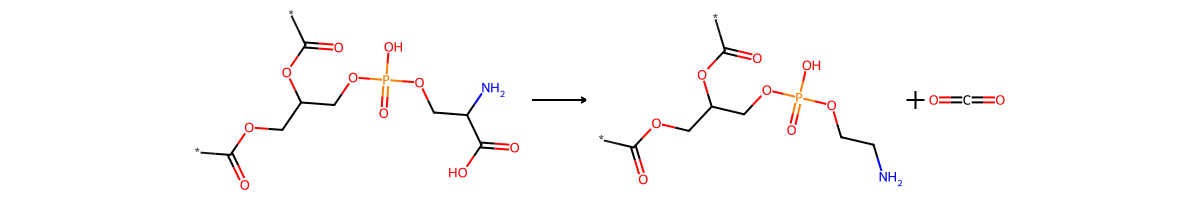

[32132, 59541]


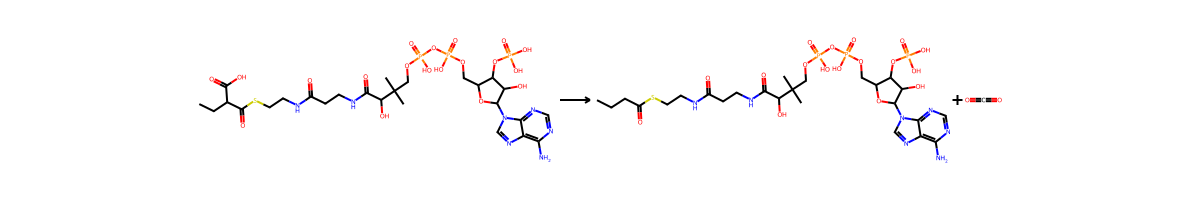

[16558]


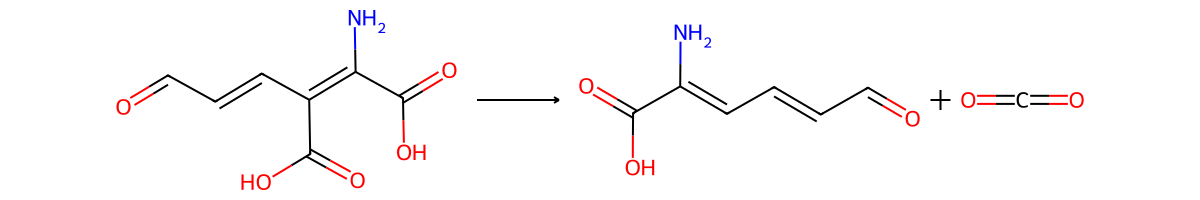

[17642]


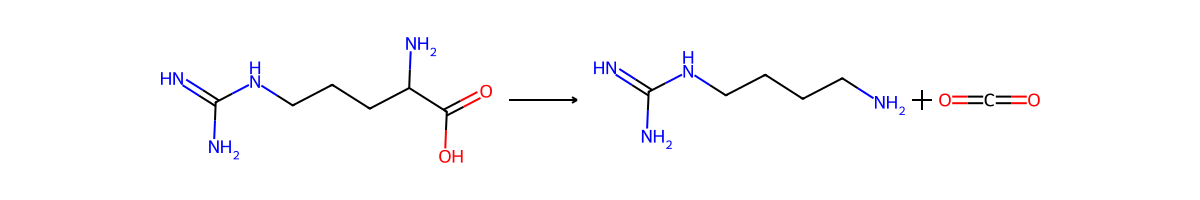

[11597]


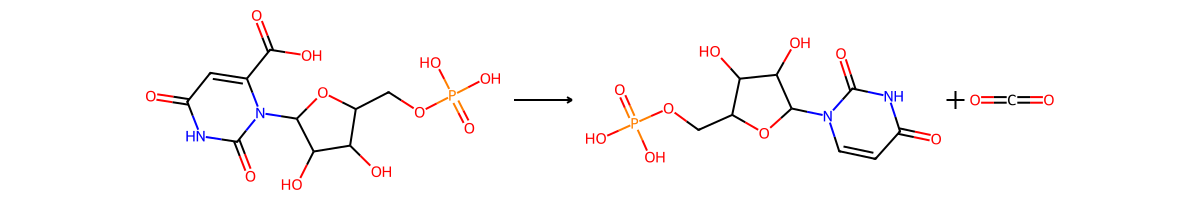

[19498]


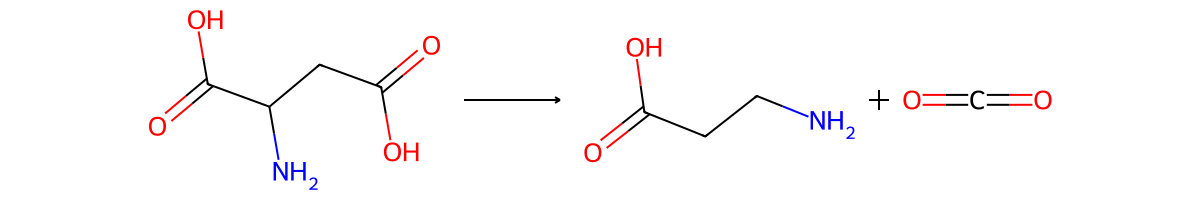

[15642]


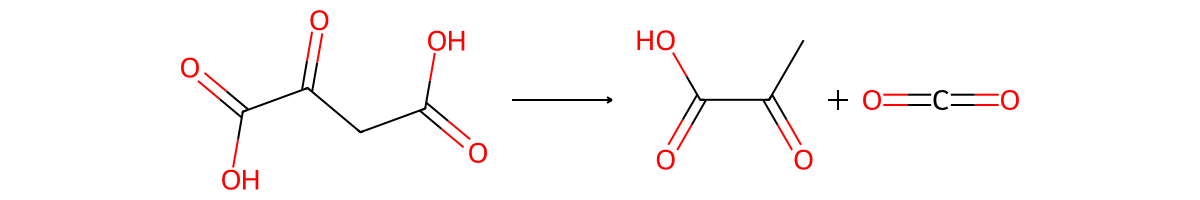

[15982]


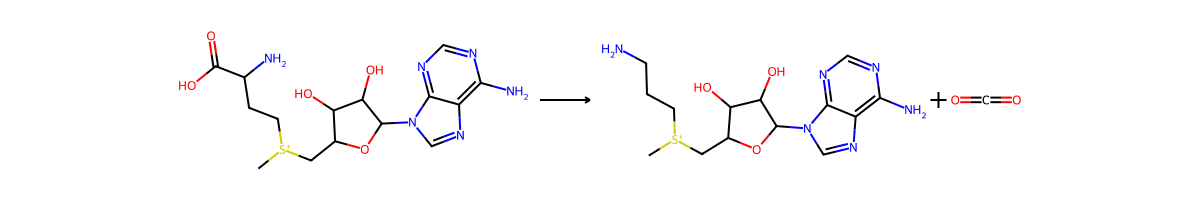

[21493]


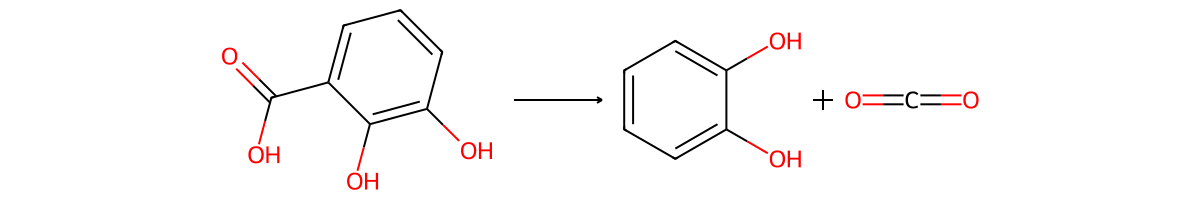

[10793]


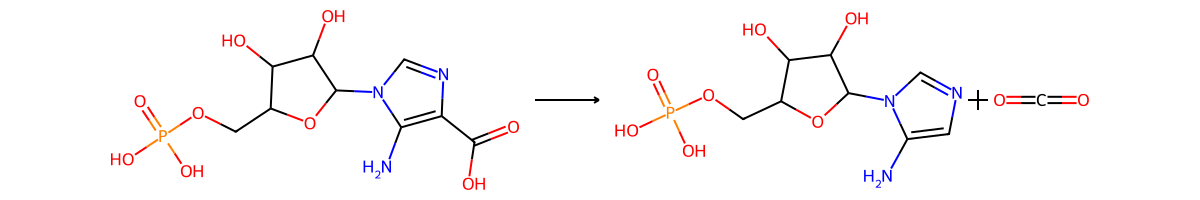

[49465]


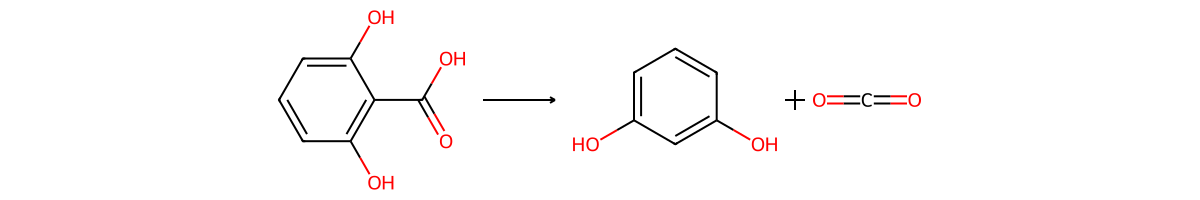

[52405, 52417]


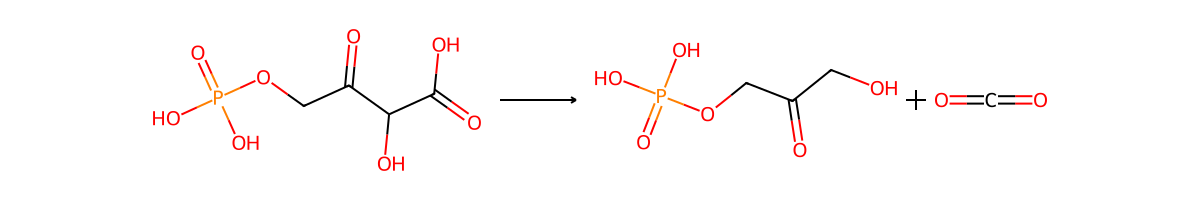

[24461]


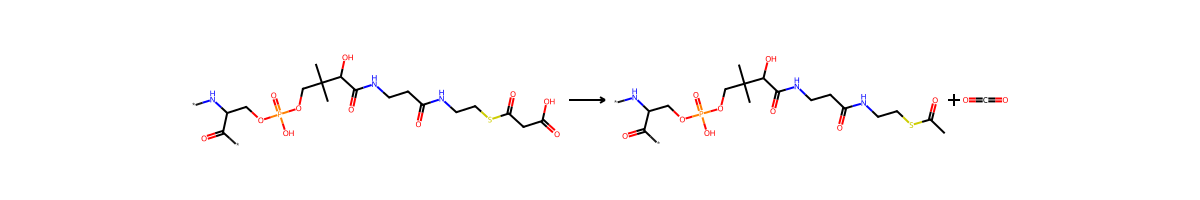

[51489]


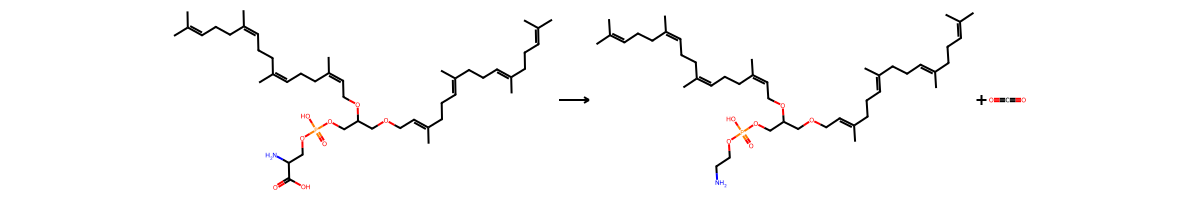

[23917]


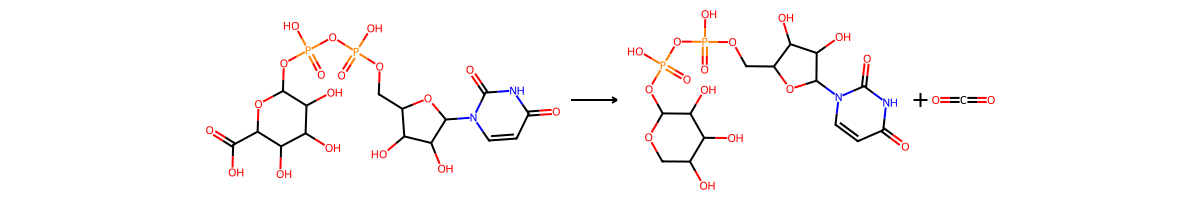

[22965, 59049]


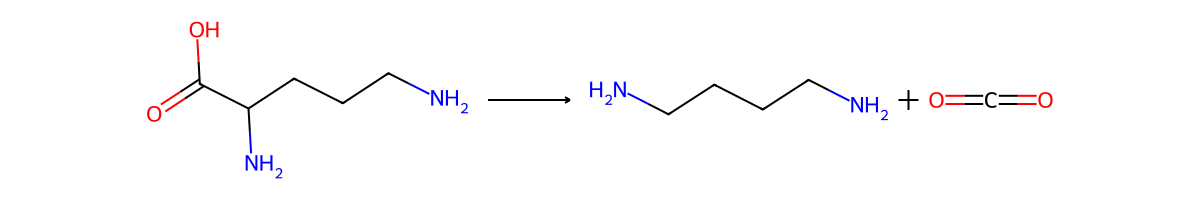

[11629]


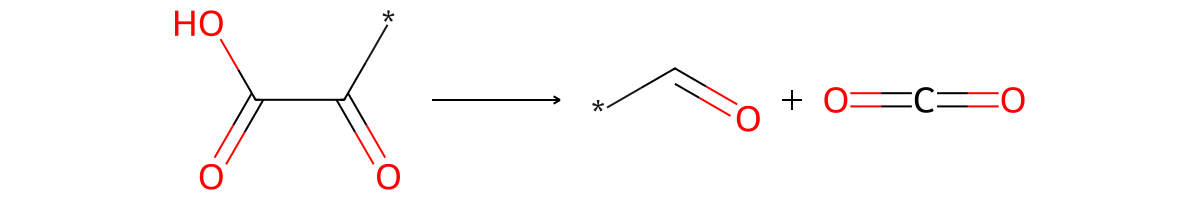

[64265]


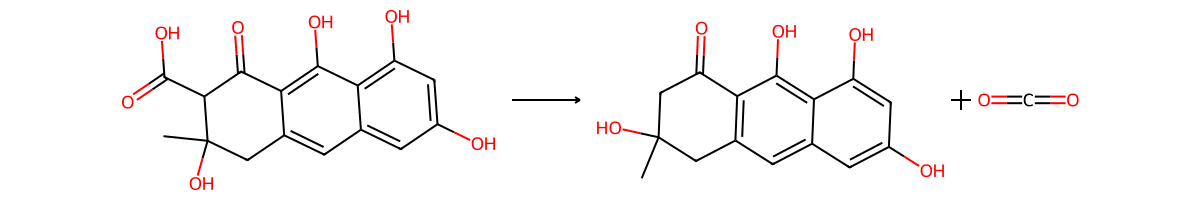

[19730]


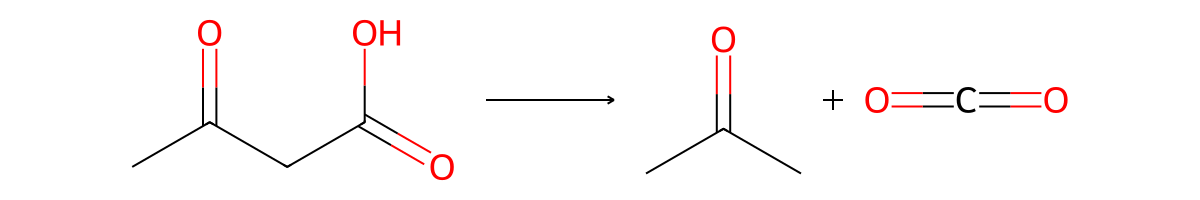

[11493]


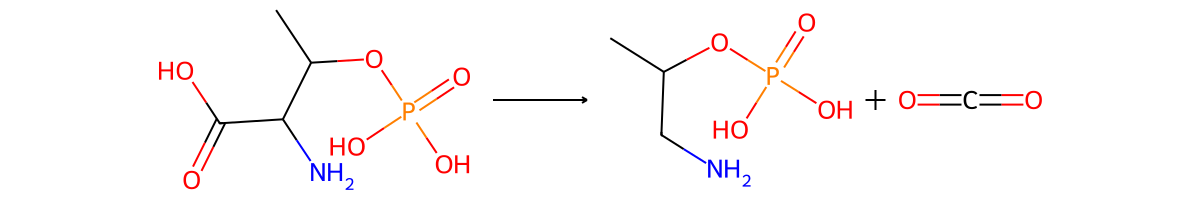

[18018]


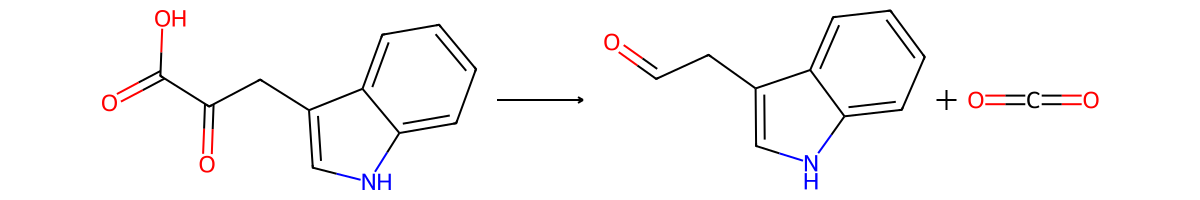

[15102]


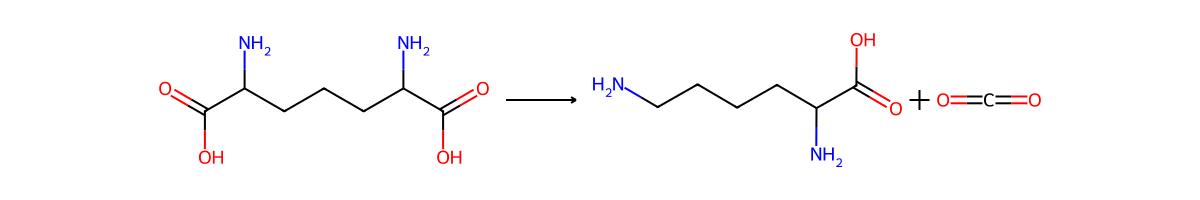

[61341, 27667]


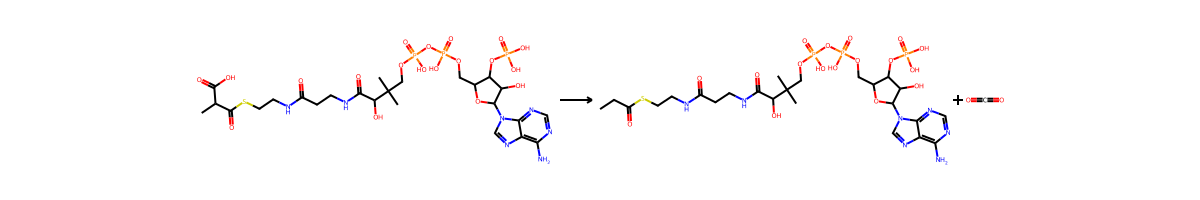

[45485]


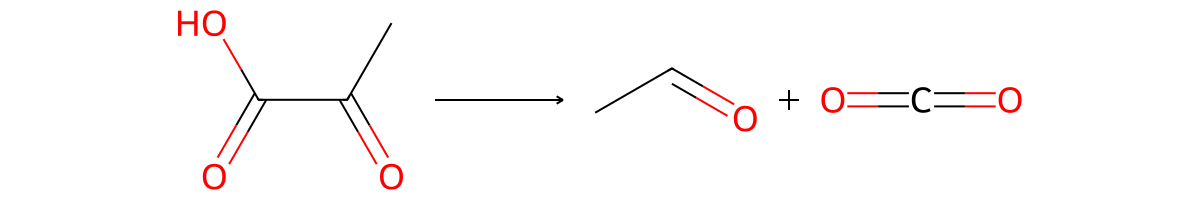

[11341]


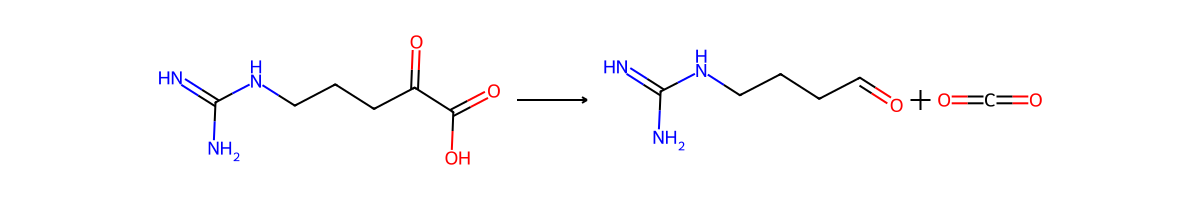

[33228]


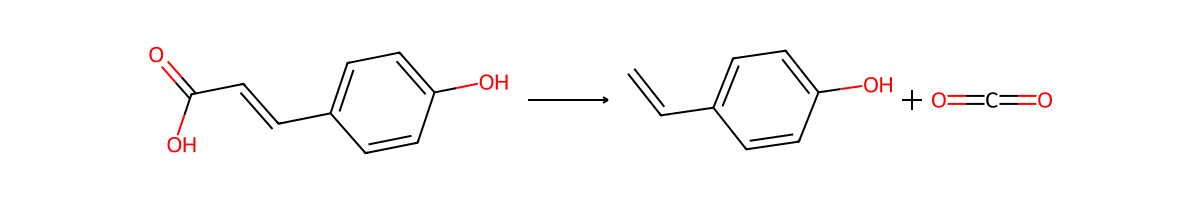

[16794]


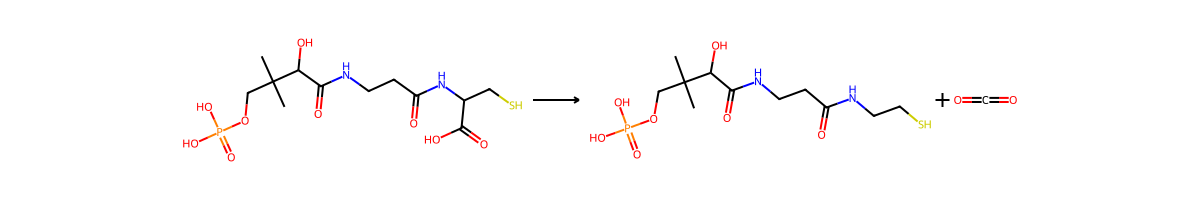

[21581]


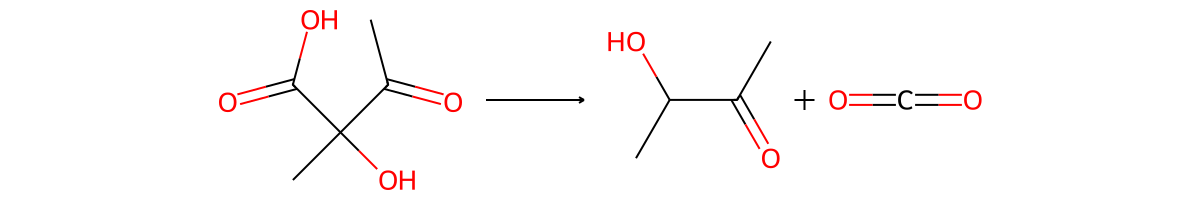

[15254, 57729]


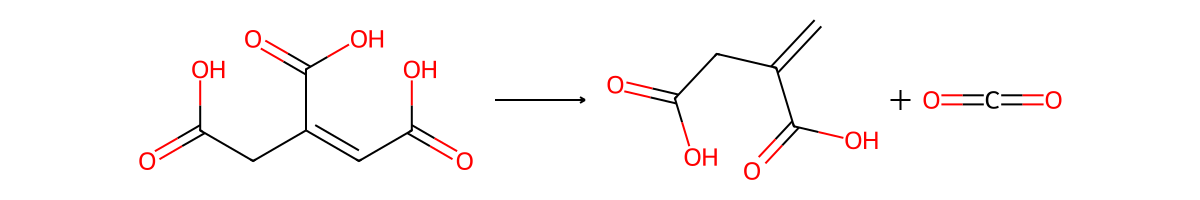

[17786]


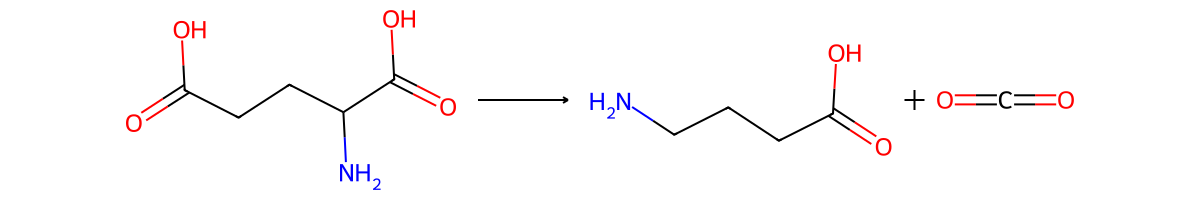

[33808]


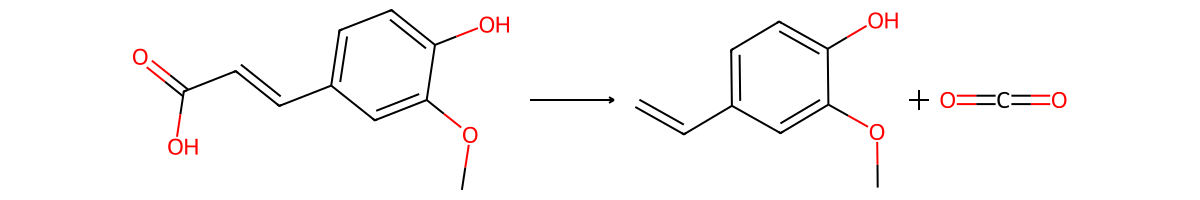

[54361]


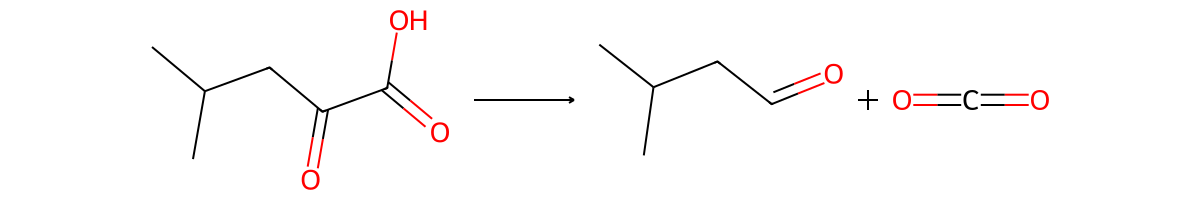

[34096]


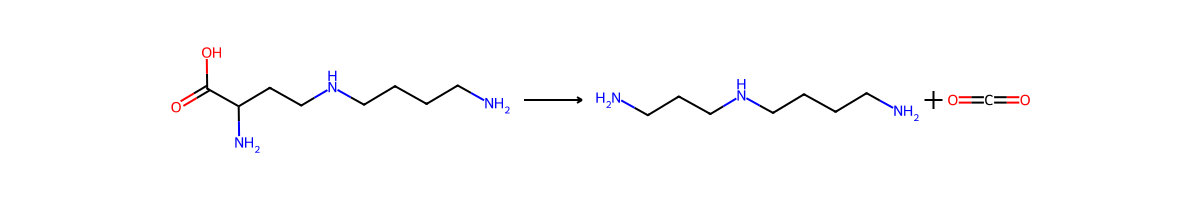

[30340]


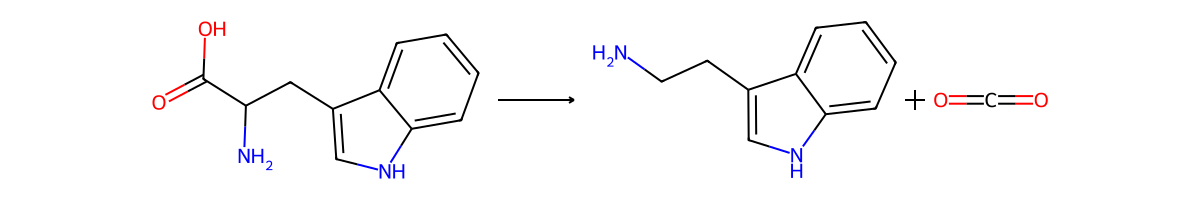

[14354]


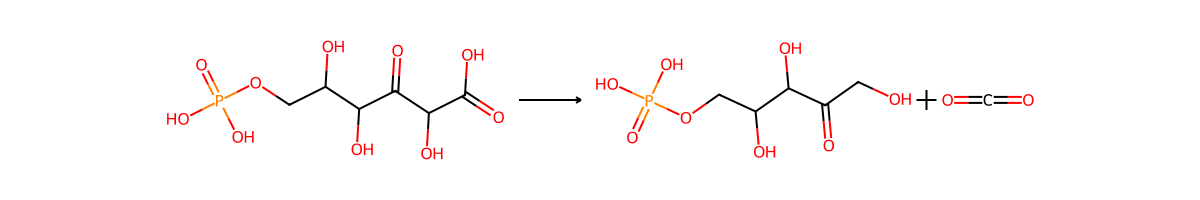

[46921]


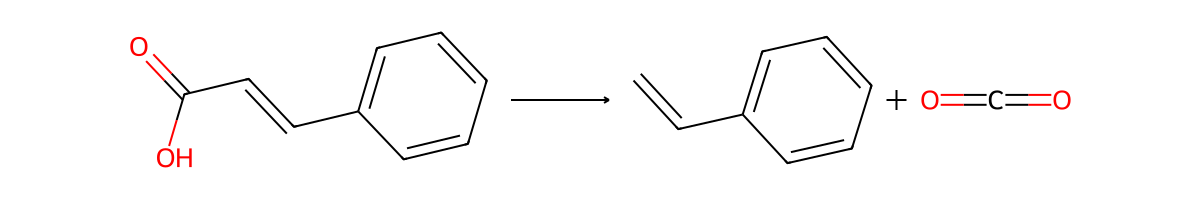

[20841]


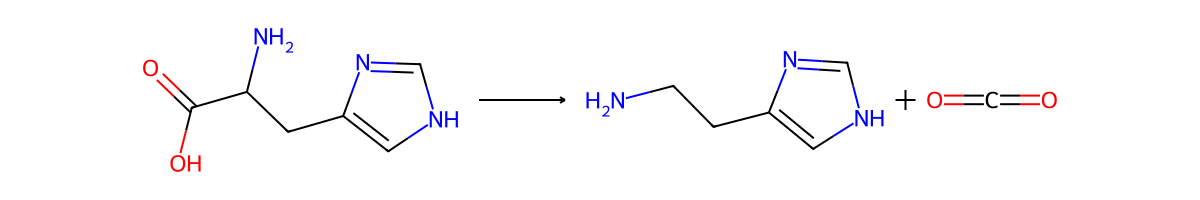

[16878]


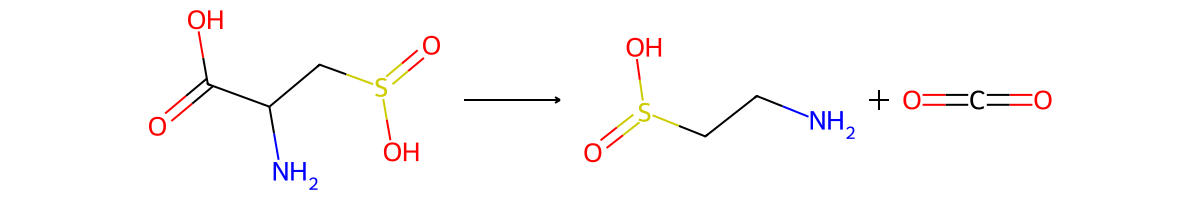

[12273]


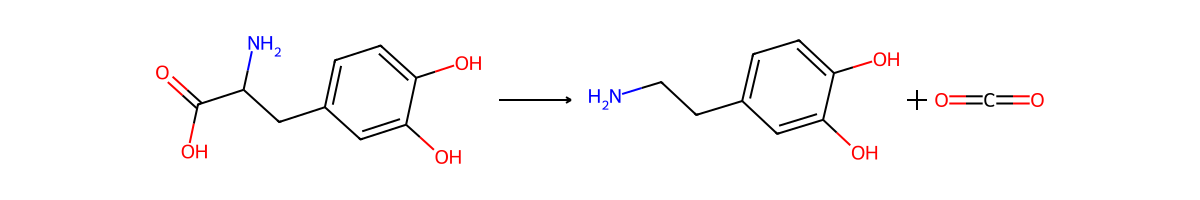

[19718]


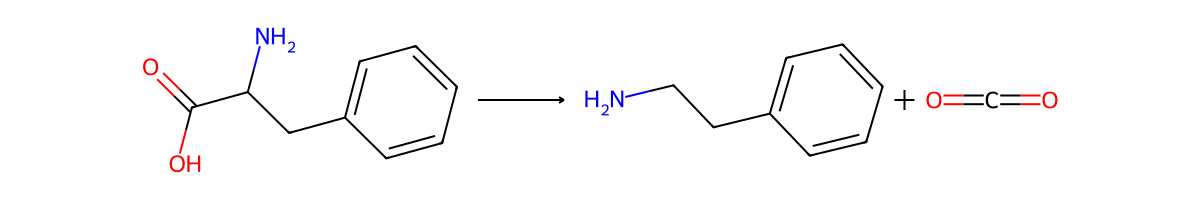

[20949]


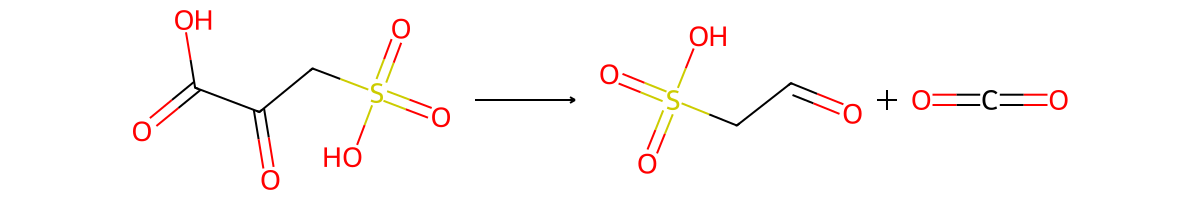

[14346]


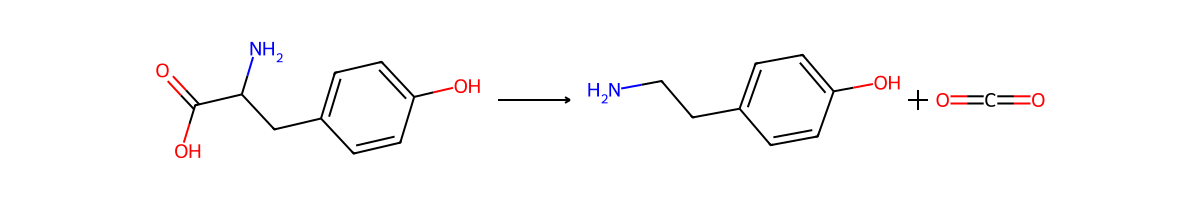

[54357]


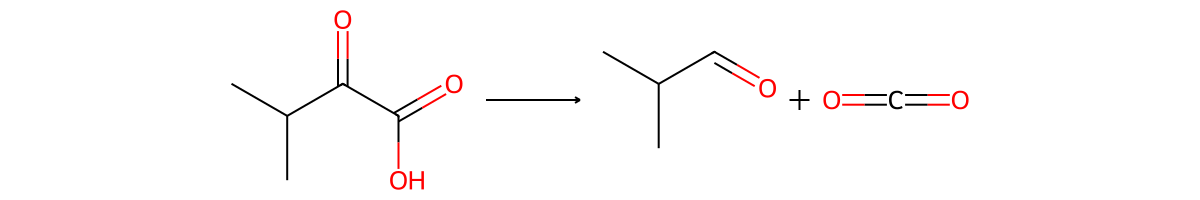

[56061]


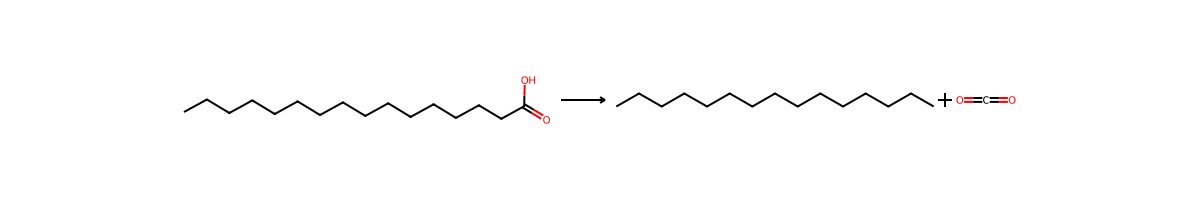

[13318]


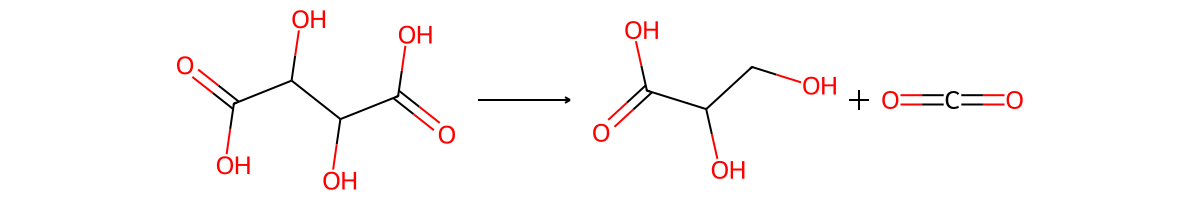

[50313]


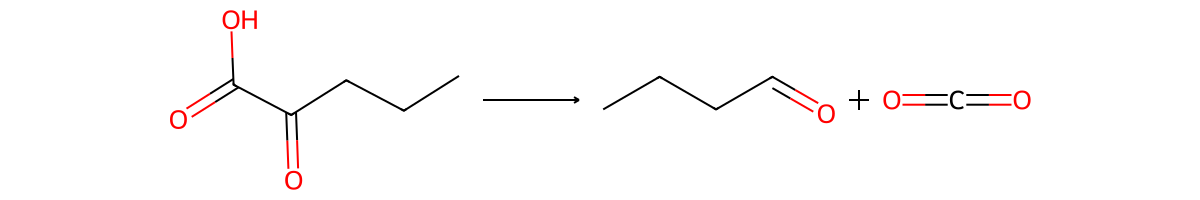

[10525]


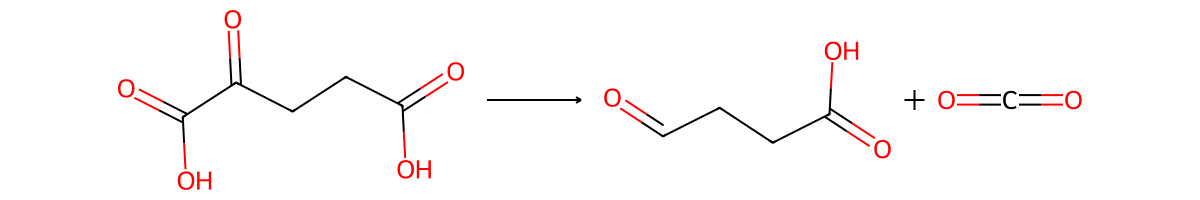

[21109]


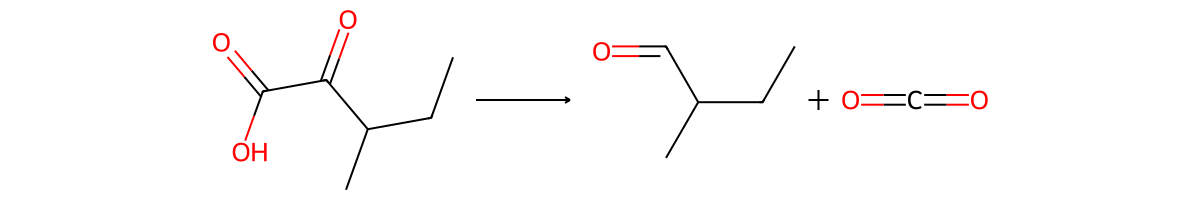

[24185]


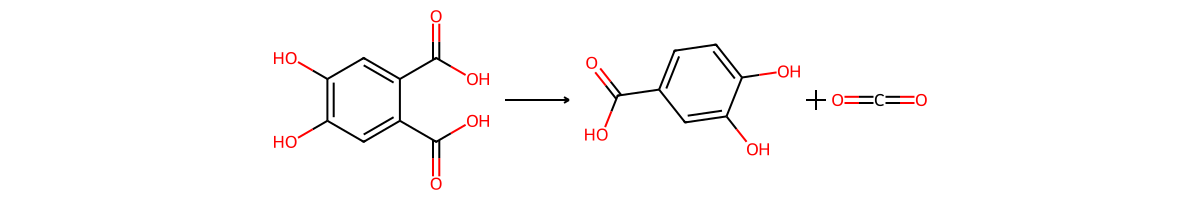

[18534]


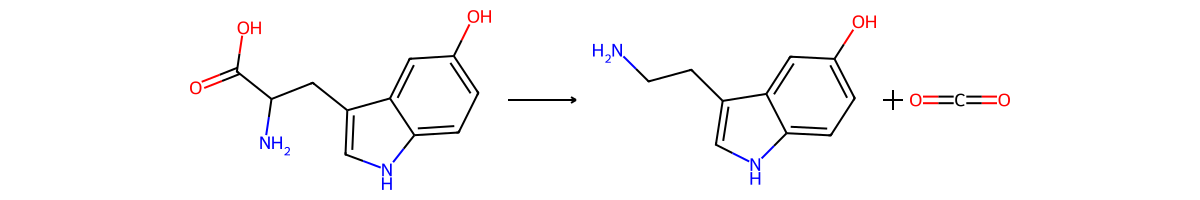

[34100]


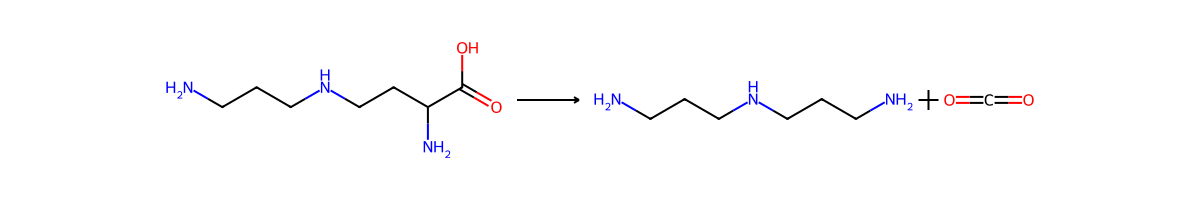

[69549]


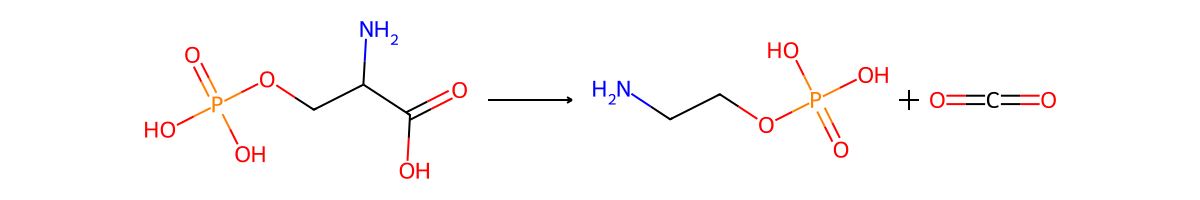

[25222]


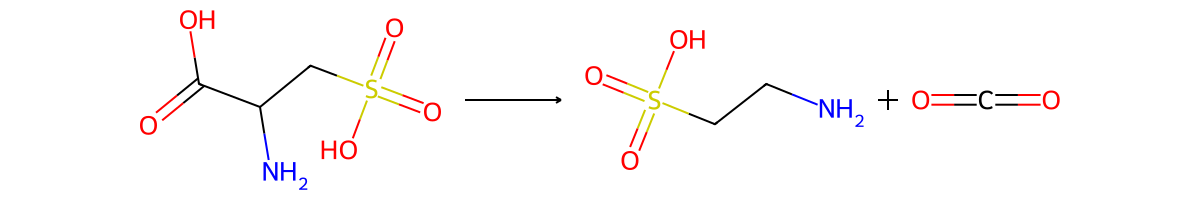

[71556]


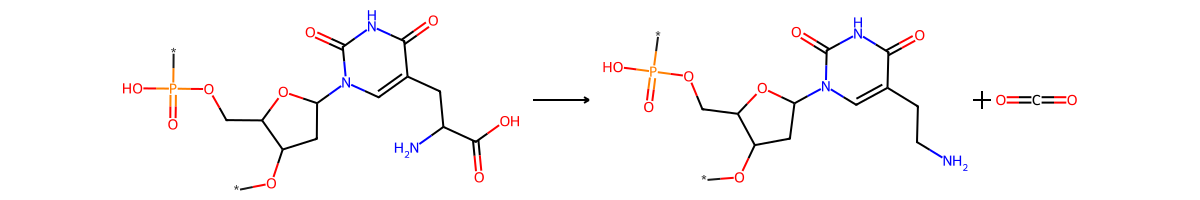

[22353, 59053]


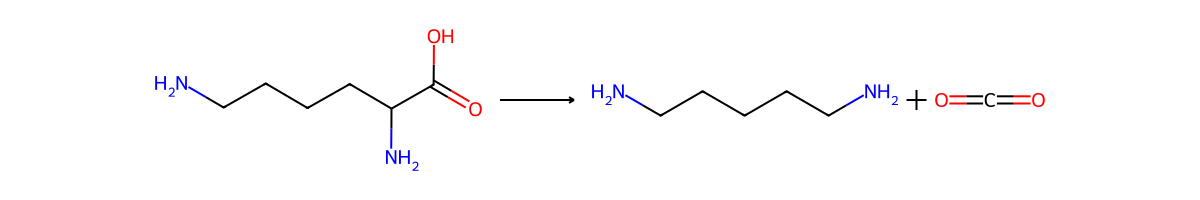

[18698]


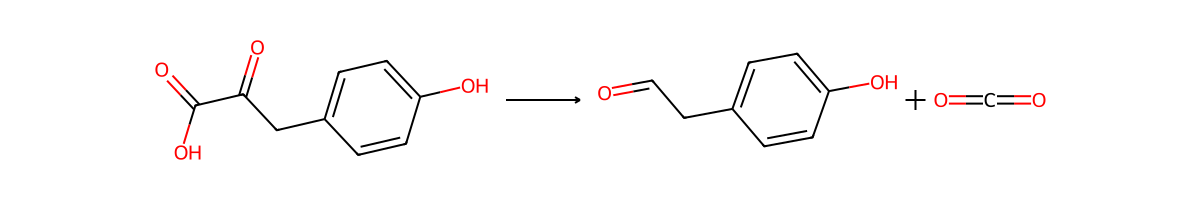

[45825]


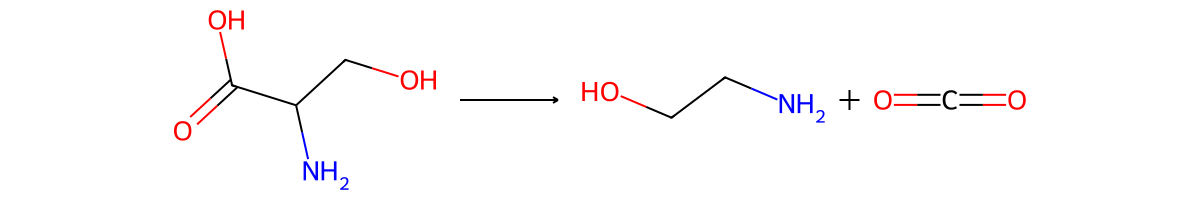

[30704]


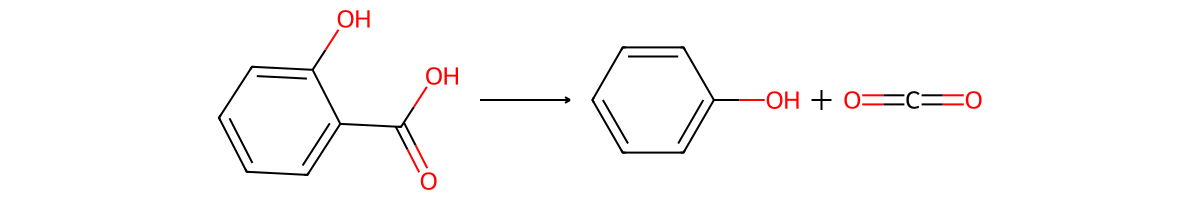

[55073]


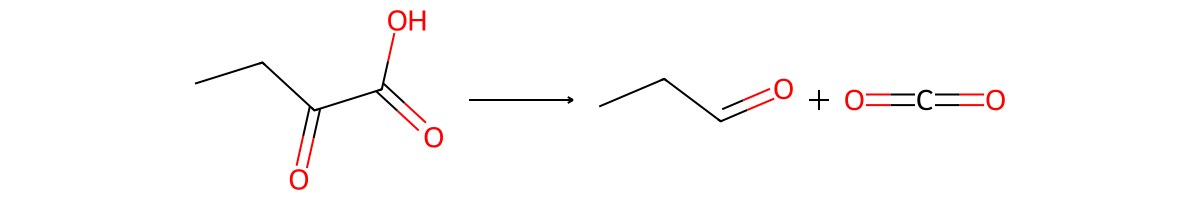

[19334]


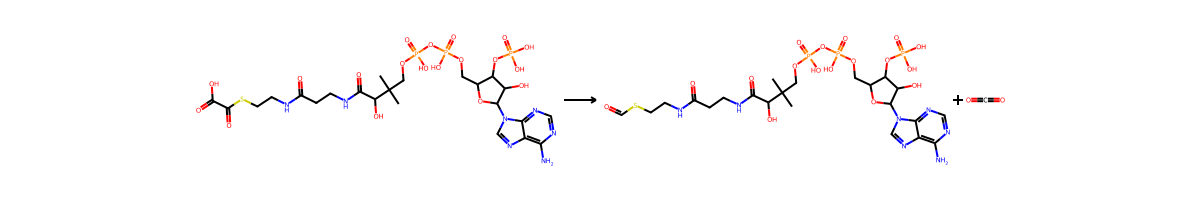

[13670]


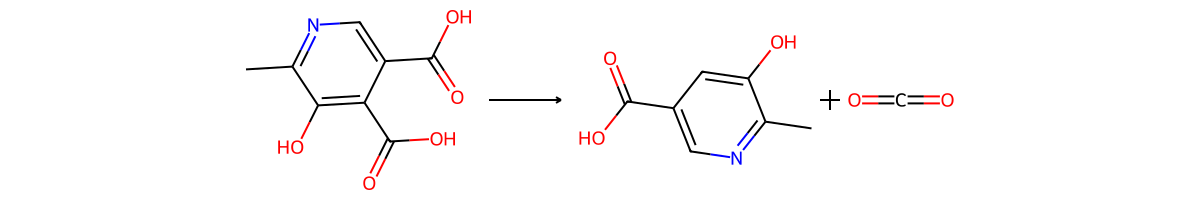

[45161]


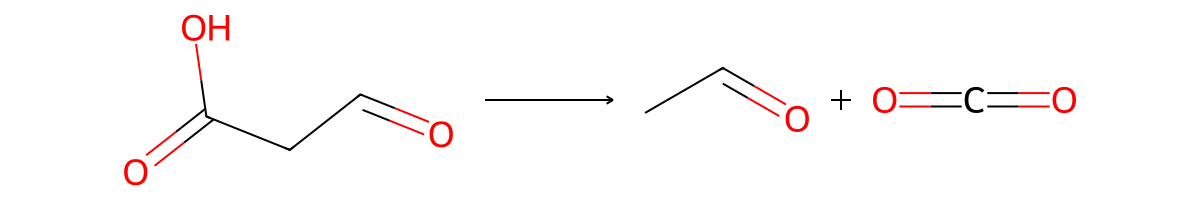

[14186]


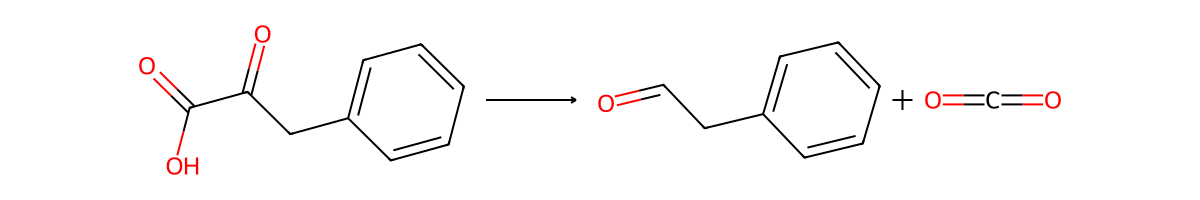

[46277]


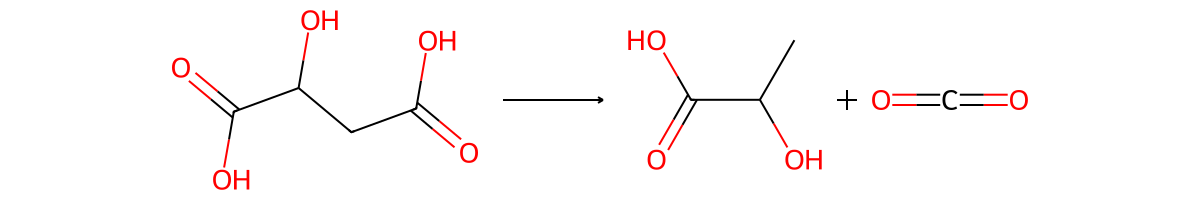

[23369]


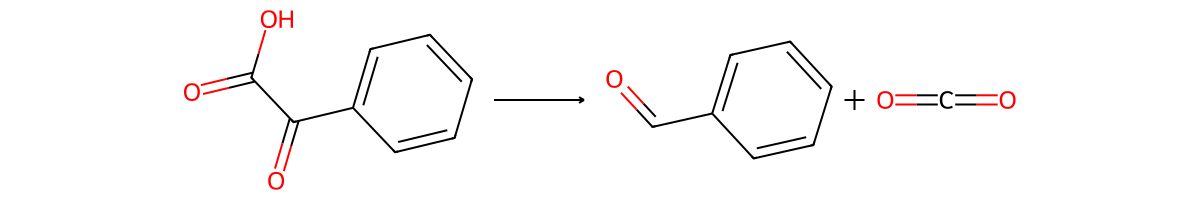

[71572]


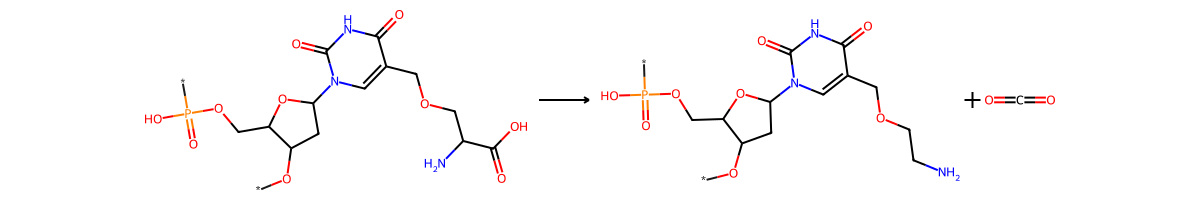

[20514]


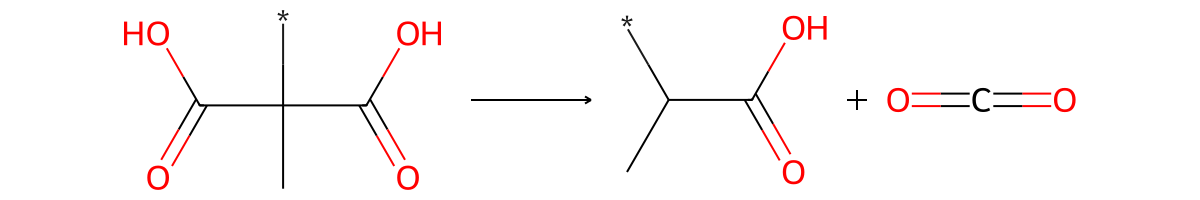

[16510]


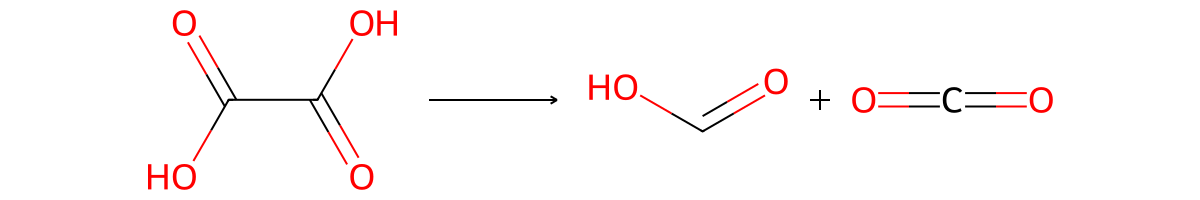

[22417]


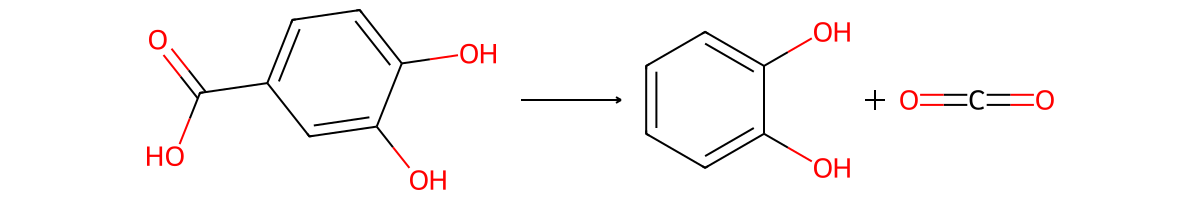

[77376]


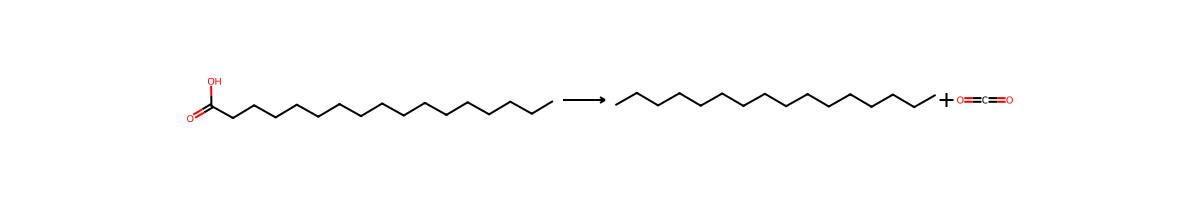

[57073]


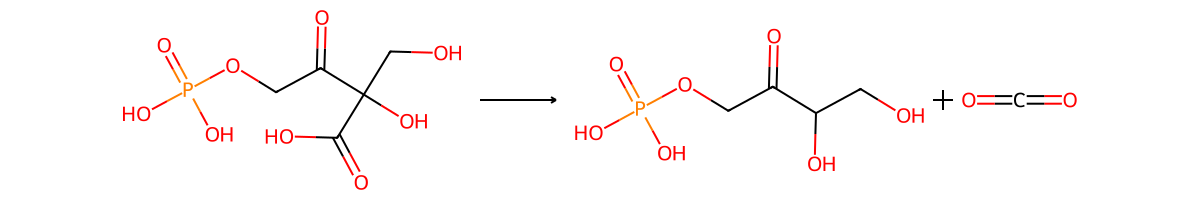

[15690]


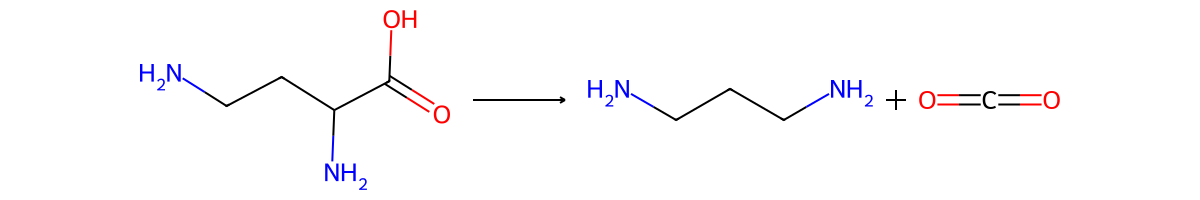

[31376]


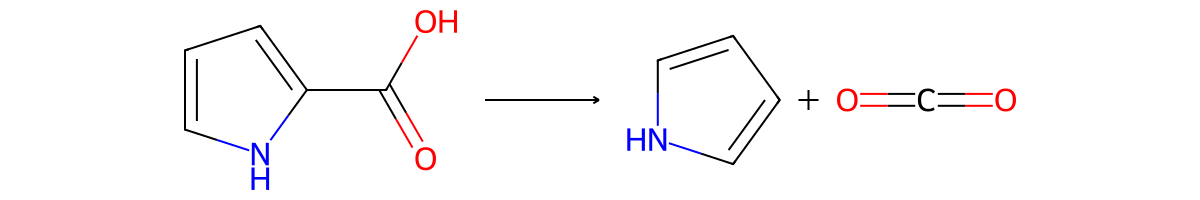

[57053]


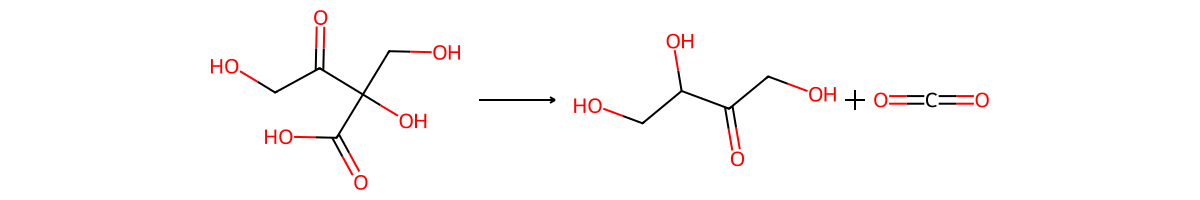

[20769]


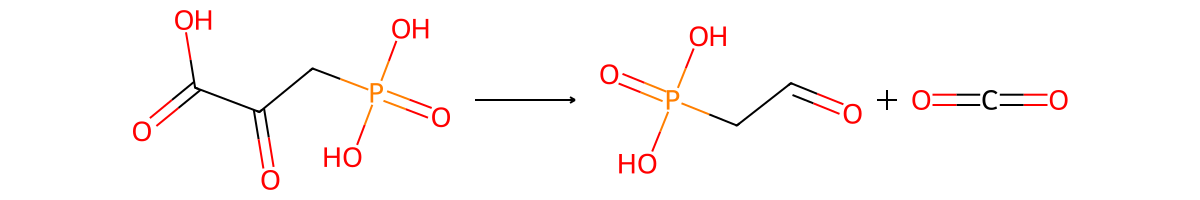

[53957]


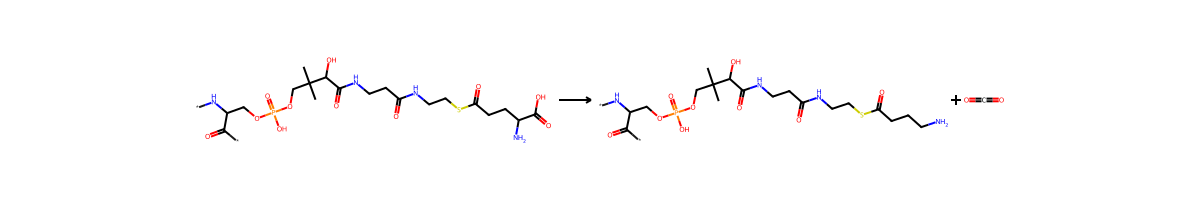

[12622]


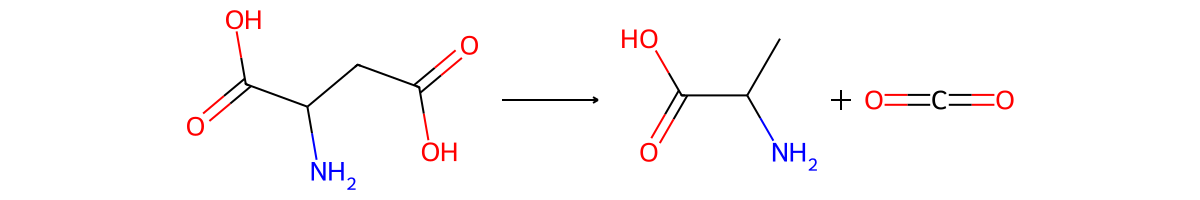

[77244]


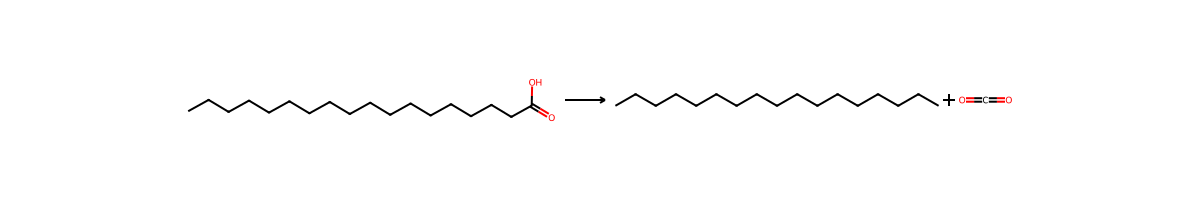

[77384]


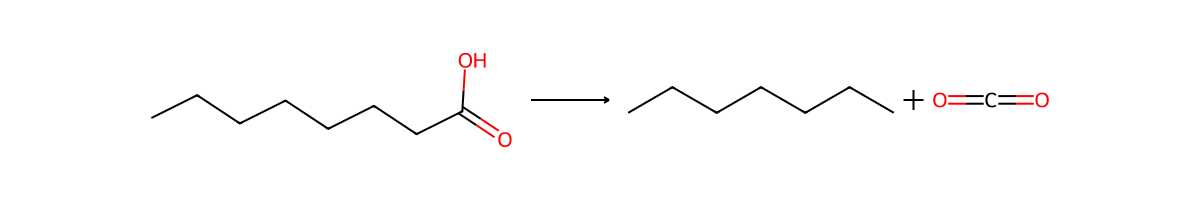

[74528]


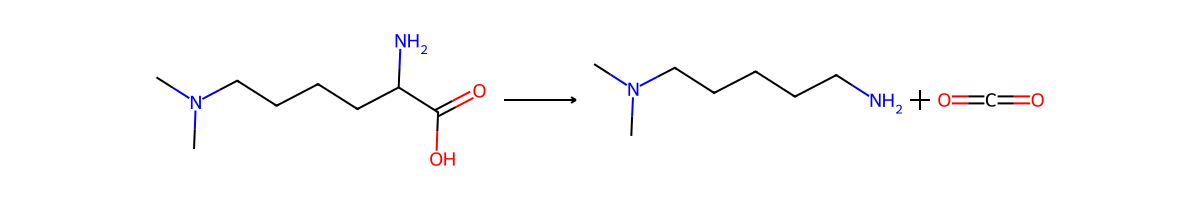

[77380]


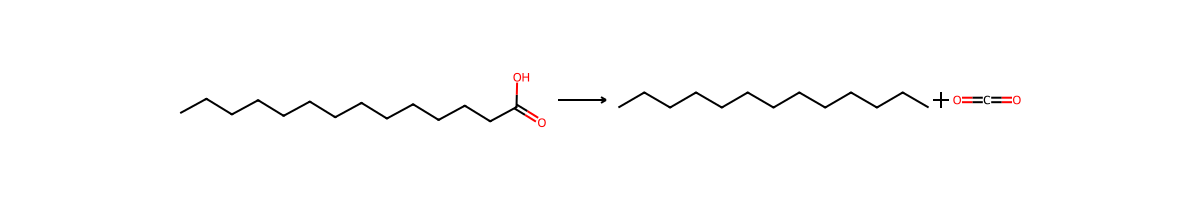

[27747]


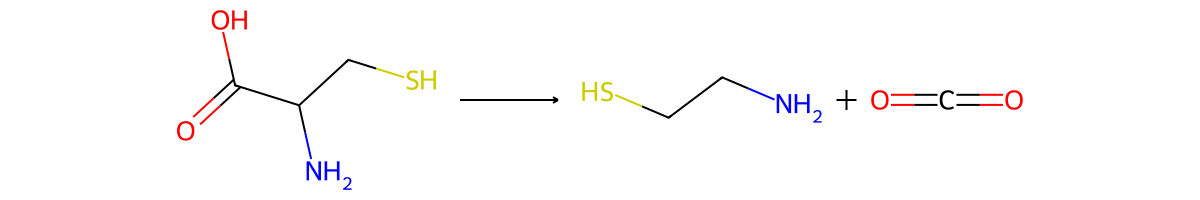

[23113]


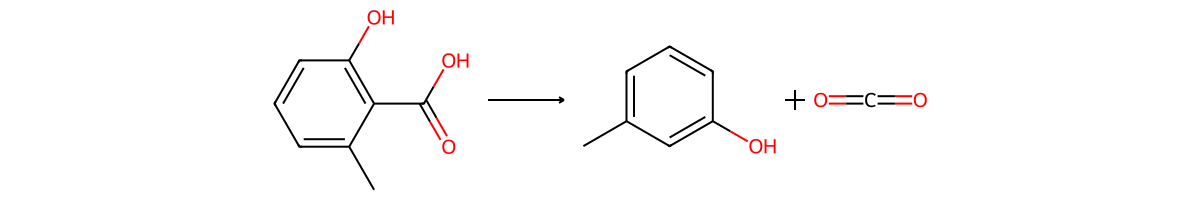

[59217]


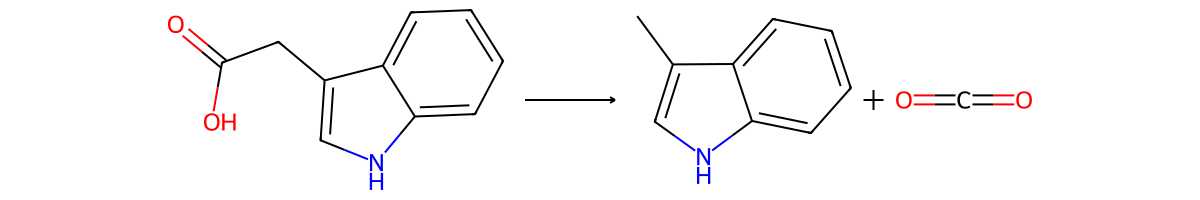

[59121]


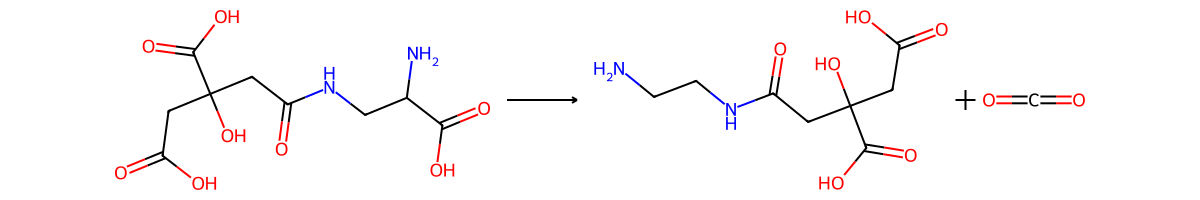

[55077]


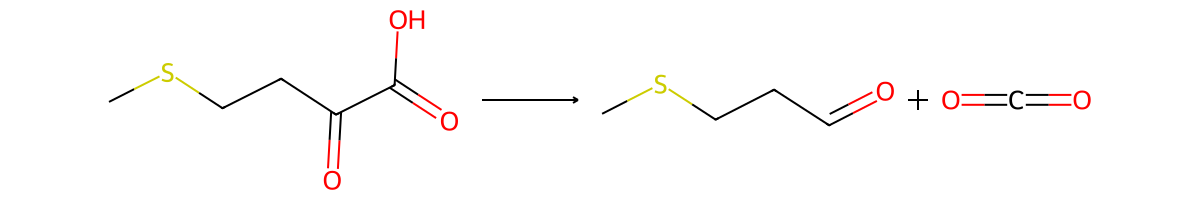

In [201]:
for k, v in krs.items():
    if v['min_rule'] == 'rule0024':
        print(v['rhea_ids'])
        display(SVG(draw_reaction(v['smarts'])))

In [234]:
%load_ext autoreload
%autoreload 2

In [ ]:
from cgr.featurize import MorganFingerprinter, MolFeaturizer, rule_default
from cgr.ml import sep_aidx_to_bin_label
from ergochemics.mapping import get_reaction_center

In [207]:
mapped["template_aidxs"] = mapped["template_aidxs"].apply(rc_to_nest)

/tmp/ipykernel_2292/3183109696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mapped["template_aidxs"] = mapped["template_aidxs"].apply(rc_to_nest)


In [208]:
mapped.head()

,rxn_id,smarts,am_smarts,rule,template_aidxs,rule_id
89,10198,O=P(O)(OCC(O)CO)OC1C(O)C(O)C(O)C(O)C1O.CCCCCCC...,[O:10]=[P:9]([OH:11])([O:8][CH2:7][CH:5]([OH:6...,[*:1](~[O&D1&v2&H1&0*&!R:2])~[*:3]~[O&D1&v2&H1...,"(((5, 6, 7, 8), (17, 18, 19)), ((17, 18, 19, 2...",703
287,10665,CCCCCCCCC=CCCCCCCCC(=O)NCCOP(=O)(O)OCC(O)CO.CC...,[CH3:34][CH2:33][CH2:32][CH2:31][CH2:30][CH2:2...,[*:1](~[O&D1&v2&H1&0*&!R:2])~[*:3]~[O&D1&v2&H1...,"(((28, 29, 30, 31), (17, 18, 19)), ((28, 29, 3...",703
338,10782,OCC1OC(O)C(O)C(O)C1O.CC(C=CC1(O)C(C)=CC(=O)CC1...,[OH:14][CH2:12][CH:11]1[O:13][CH:4]([OH:3])[CH...,[*:1](~[O&D1&v2&H1&0*&!R:2])~[*:3]~[O&D1&v2&H1...,"(((4, 5, 6, 7), (16, 17, 18)), ((16, 17, 18, 1...",703
347,10793,C[N+](C)(C)CCOP(=O)(O)OCC(O)CO.CCCCCC=CC=CC(O)...,[CH3:16][N+:15]([CH3:17])([CH3:18])[CH2:14][CH...,[*:1](~[O&D1&v2&H1&0*&!R:2])~[*:3]~[O&D1&v2&H1...,"(((12, 13, 14, 15), (20, 21, 22)), ((20, 21, 2...",703
386,10880,OCC(O)CO.CCCCCCCCCC(=O)O>>CCCCCCCCCC(=O)OCC(O)...,[OH:3][CH2:4][CH:5]([OH:6])[CH2:7][OH:8].[CH3:...,[*:1](~[O&D1&v2&H1&0*&!R:2])~[*:3]~[O&D1&v2&H1...,"(((1, 0, 2, 3), (9, 10, 11)), ((9, 10, 11, 12,...",703


In [210]:
mol_featurizer = MolFeaturizer(atom_featurizer=rule_default)
mfper = MorganFingerprinter(radius=3, length=1024, mol_featurizer=mol_featurizer)

In [232]:
row = mapped.loc[mapped.rxn_id == '10198']
smarts = row['smarts'].values[0]
am_smarts = row['am_smarts'].values[0]
rc = get_reaction_center(am_smarts)
lhs_block_rc, rhs_block_rc = [np.flatnonzero(elt) for elt in sep_aidx_to_bin_label(smarts, rc)]
lhs_block_rc = [int(elt) for elt in lhs_block_rc]

In [241]:
fp = mfper.fingerprint(
    mol=Chem.MolFromSmiles(smarts.split('>>')[0]), 
    reaction_center=lhs_block_rc,
    rc_dist_ub=1
)
np.dot(fp, fp) / (np.linalg.norm(fp) * np.linalg.norm(fp))

np.float64(0.9999999999999999)

In [243]:
from functools import partial

In [269]:
_fingerprint = partial(mfper.fingerprint, rc_dist_ub=None)
fp = _fingerprint(
    mol=Chem.MolFromSmiles(smarts.split('>>')[0]), 
    reaction_center=[],
)
np.dot(fp, fp) / (np.linalg.norm(fp) * np.linalg.norm(fp))

np.float64(1.0)

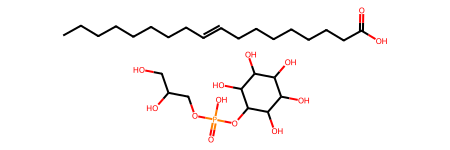

In [230]:
Chem.MolFromSmiles(smarts.split('>>')[0])

In [246]:
pk.reactions[list(pk.reactions)[0]]

{'_id': 'R3b25a7e0bed159020e2a34dc51c3cf7529c6ec40381771438eb358f75257459d',
 'Reactants': [(1, 'C4fe83a533b208e245e45b74e0967d7b8e9aad361'),
  (1, 'X731743cee49a2049f3c8c017ce750f23dcaab919')],
 'Products': [(1, 'C87f1186286131c8289ccc13402638ebf712c5245'),
  (1, 'X9c29f84930a190d9086a46c344020283c85fb917')],
 'Operators': {'8661_1'},
 'SMILES_rxn': '(1) O=C(O)CCC(=O)O + (1) Nc1ncnc2c1ncn2C1OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(O)C1O => (1) O=C(O)CCC(=O)OP(=O)(O)O + (1) Nc1ncnc2c1ncn2C1OC(COP(=O)(O)OP(=O)(O)O)C(O)C1O',
 'Operator_aligned_smarts': 'O=C(O)CCC(=O)O.Nc1ncnc2c1ncn2C1OC(COP(=O)(O)OP(=O)(O)OP(=O)(O)O)C(O)C1O>>O=C(O)CCC(=O)OP(=O)(O)O.Nc1ncnc2c1ncn2C1OC(COP(=O)(O)OP(=O)(O)O)C(O)C1O'}

In [247]:
mapped.head()

,rxn_id,smarts,am_smarts,rule,template_aidxs,rule_id
89,10198,O=P(O)(OCC(O)CO)OC1C(O)C(O)C(O)C(O)C1O.CCCCCCC...,[O:10]=[P:9]([OH:11])([O:8][CH2:7][CH:5]([OH:6...,[*:1](~[O&D1&v2&H1&0*&!R:2])~[*:3]~[O&D1&v2&H1...,"(((5, 6, 7, 8), (17, 18, 19)), ((17, 18, 19, 2...",703
287,10665,CCCCCCCCC=CCCCCCCCC(=O)NCCOP(=O)(O)OCC(O)CO.CC...,[CH3:34][CH2:33][CH2:32][CH2:31][CH2:30][CH2:2...,[*:1](~[O&D1&v2&H1&0*&!R:2])~[*:3]~[O&D1&v2&H1...,"(((28, 29, 30, 31), (17, 18, 19)), ((28, 29, 3...",703
338,10782,OCC1OC(O)C(O)C(O)C1O.CC(C=CC1(O)C(C)=CC(=O)CC1...,[OH:14][CH2:12][CH:11]1[O:13][CH:4]([OH:3])[CH...,[*:1](~[O&D1&v2&H1&0*&!R:2])~[*:3]~[O&D1&v2&H1...,"(((4, 5, 6, 7), (16, 17, 18)), ((16, 17, 18, 1...",703
347,10793,C[N+](C)(C)CCOP(=O)(O)OCC(O)CO.CCCCCC=CC=CC(O)...,[CH3:16][N+:15]([CH3:17])([CH3:18])[CH2:14][CH...,[*:1](~[O&D1&v2&H1&0*&!R:2])~[*:3]~[O&D1&v2&H1...,"(((12, 13, 14, 15), (20, 21, 22)), ((20, 21, 2...",703
386,10880,OCC(O)CO.CCCCCCCCCC(=O)O>>CCCCCCCCCC(=O)OCC(O)...,[OH:3][CH2:4][CH:5]([OH:6])[CH2:7][OH:8].[CH3:...,[*:1](~[O&D1&v2&H1&0*&!R:2])~[*:3]~[O&D1&v2&H1...,"(((1, 0, 2, 3), (9, 10, 11)), ((9, 10, 11, 12,...",703


In [251]:
eg = mapped.loc[mapped.rxn_id.isin({"10880", "10793"})]

In [252]:
def get_lhs_block_rc(am_smarts: str) -> list[int]:
    rc = get_reaction_center(am_smarts)
    block_rc = [np.flatnonzero(elt) for elt in sep_aidx_to_bin_label(am_smarts, rc)]
    lhs_block_rc = [int(elt) for elt in block_rc[0]]
    return lhs_block_rc

In [253]:
eg["reaction_center"] = eg["am_smarts"].apply(get_lhs_block_rc)

/tmp/ipykernel_2292/1341838076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eg["reaction_center"] = eg["am_smarts"].apply(get_lhs_block_rc)


In [254]:
eg.head()

,rxn_id,smarts,am_smarts,rule,template_aidxs,rule_id,reaction_center
347,10793,C[N+](C)(C)CCOP(=O)(O)OCC(O)CO.CCCCCC=CC=CC(O)...,[CH3:16][N+:15]([CH3:17])([CH3:18])[CH2:14][CH...,[*:1](~[O&D1&v2&H1&0*&!R:2])~[*:3]~[O&D1&v2&H1...,"(((12, 13, 14, 15), (20, 21, 22)), ((20, 21, 2...",703,"[13, 36, 38]"
386,10880,OCC(O)CO.CCCCCCCCCC(=O)O>>CCCCCCCCCC(=O)OCC(O)...,[OH:3][CH2:4][CH:5]([OH:6])[CH2:7][OH:8].[CH3:...,[*:1](~[O&D1&v2&H1&0*&!R:2])~[*:3]~[O&D1&v2&H1...,"(((1, 0, 2, 3), (9, 10, 11)), ((9, 10, 11, 12,...",703,"[0, 15, 17]"


In [ ]:
eg["fp"] = eg.apply(lambda x : _fingerprint(Chem.MolFrom))

In [255]:
eg["mol"] = eg["smarts"].apply(lambda x: Chem.MolFromSmiles(x.split('>>')[0]))

/tmp/ipykernel_2292/1135953567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eg["mol"] = eg["smarts"].apply(lambda x: Chem.MolFromSmiles(x.split('>>')[0]))


In [257]:
eg["mfp"] = eg.apply(lambda x : _fingerprint(x.mol, x.reaction_center), axis=1)

/tmp/ipykernel_2292/2454053067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eg["mfp"] = eg.apply(lambda x : _fingerprint(x.mol, x.reaction_center), axis=1)


In [261]:
np.vstack(eg.loc[eg.rxn_id.isin({"10880", "10793"}), "mfp"])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(2, 1024), dtype=uint8)

In [262]:
fp.shape

(1024,)

In [265]:
eg.loc[eg.rxn_id.isin({"foo", "bar"}), "mfp"].empty

True

In [288]:
eg.loc[eg.rule_id.isin({703})].iloc[0].rxn_id

'10793'

In [284]:
np.argmax([1,2,3])

np.int64(2)